# Introduction
The purpose of this notebook is to perfrom Exploratory Data Analysis of the bankruptcy data obtained from Kaggle.com and to develop a machine learning model based on it that can produce a bankruptcy prediction score. The machine learning model will be exported and utilized in the development of a web application

# Exploratory Data Analysis

## 1. Import requisite libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## 2. Import and view the data

In [2]:
df = pd.read_csv("data/data.csv")
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

Now let's gather some preliminary information about our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [11]:
null_values = df.isna().sum()
print(null_values)
print("Total null values across all data features: " + str(df.isna().sum().sum()))

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
Total null values across all data features: 0


Based on this analysis, we can see that our data set contains 96 columns. The bankrupt column is going to be our Y value, so we have a total of 95 possible inputs into our machine learning model. We can also see that the data contains no null values and is composed entirely of numerical data.

Let's check to see whether the data contains any duplicate records.

In [14]:
print("Duplicate records in data: " + str(df.duplicated().sum()))

Duplicate records in data: 0


Excellent! The last preliminary item we need to check is data balance. Since our Y value is going to be the "Bankrupt?" column, we need to check exactly how many records exist for 0 and 1.

In [19]:
print(df['Bankrupt?'].value_counts())

percentage_0 = round((df['Bankrupt?'].value_counts()[0]/len(df) * 100), 2)
percentage_1 = round((df['Bankrupt?'].value_counts()[1]/len(df) * 100), 2)

print('Not bankrupt: ', percentage_0, '%')
print('Bankrupt: ', percentage_1, '%')

0    6599
1     220
Name: Bankrupt?, dtype: int64
Not bankrupt:  96.77 %
Bankrupt:  3.23 %


Not good! The dataset is extremely imbalanced. In its current state, it would be nearly impossible to create a good machine learning model. We are going to fix this later.

## Data Visualizations

### Data distribution per feature
Let's get an idea for how the data is distributed across each feature.

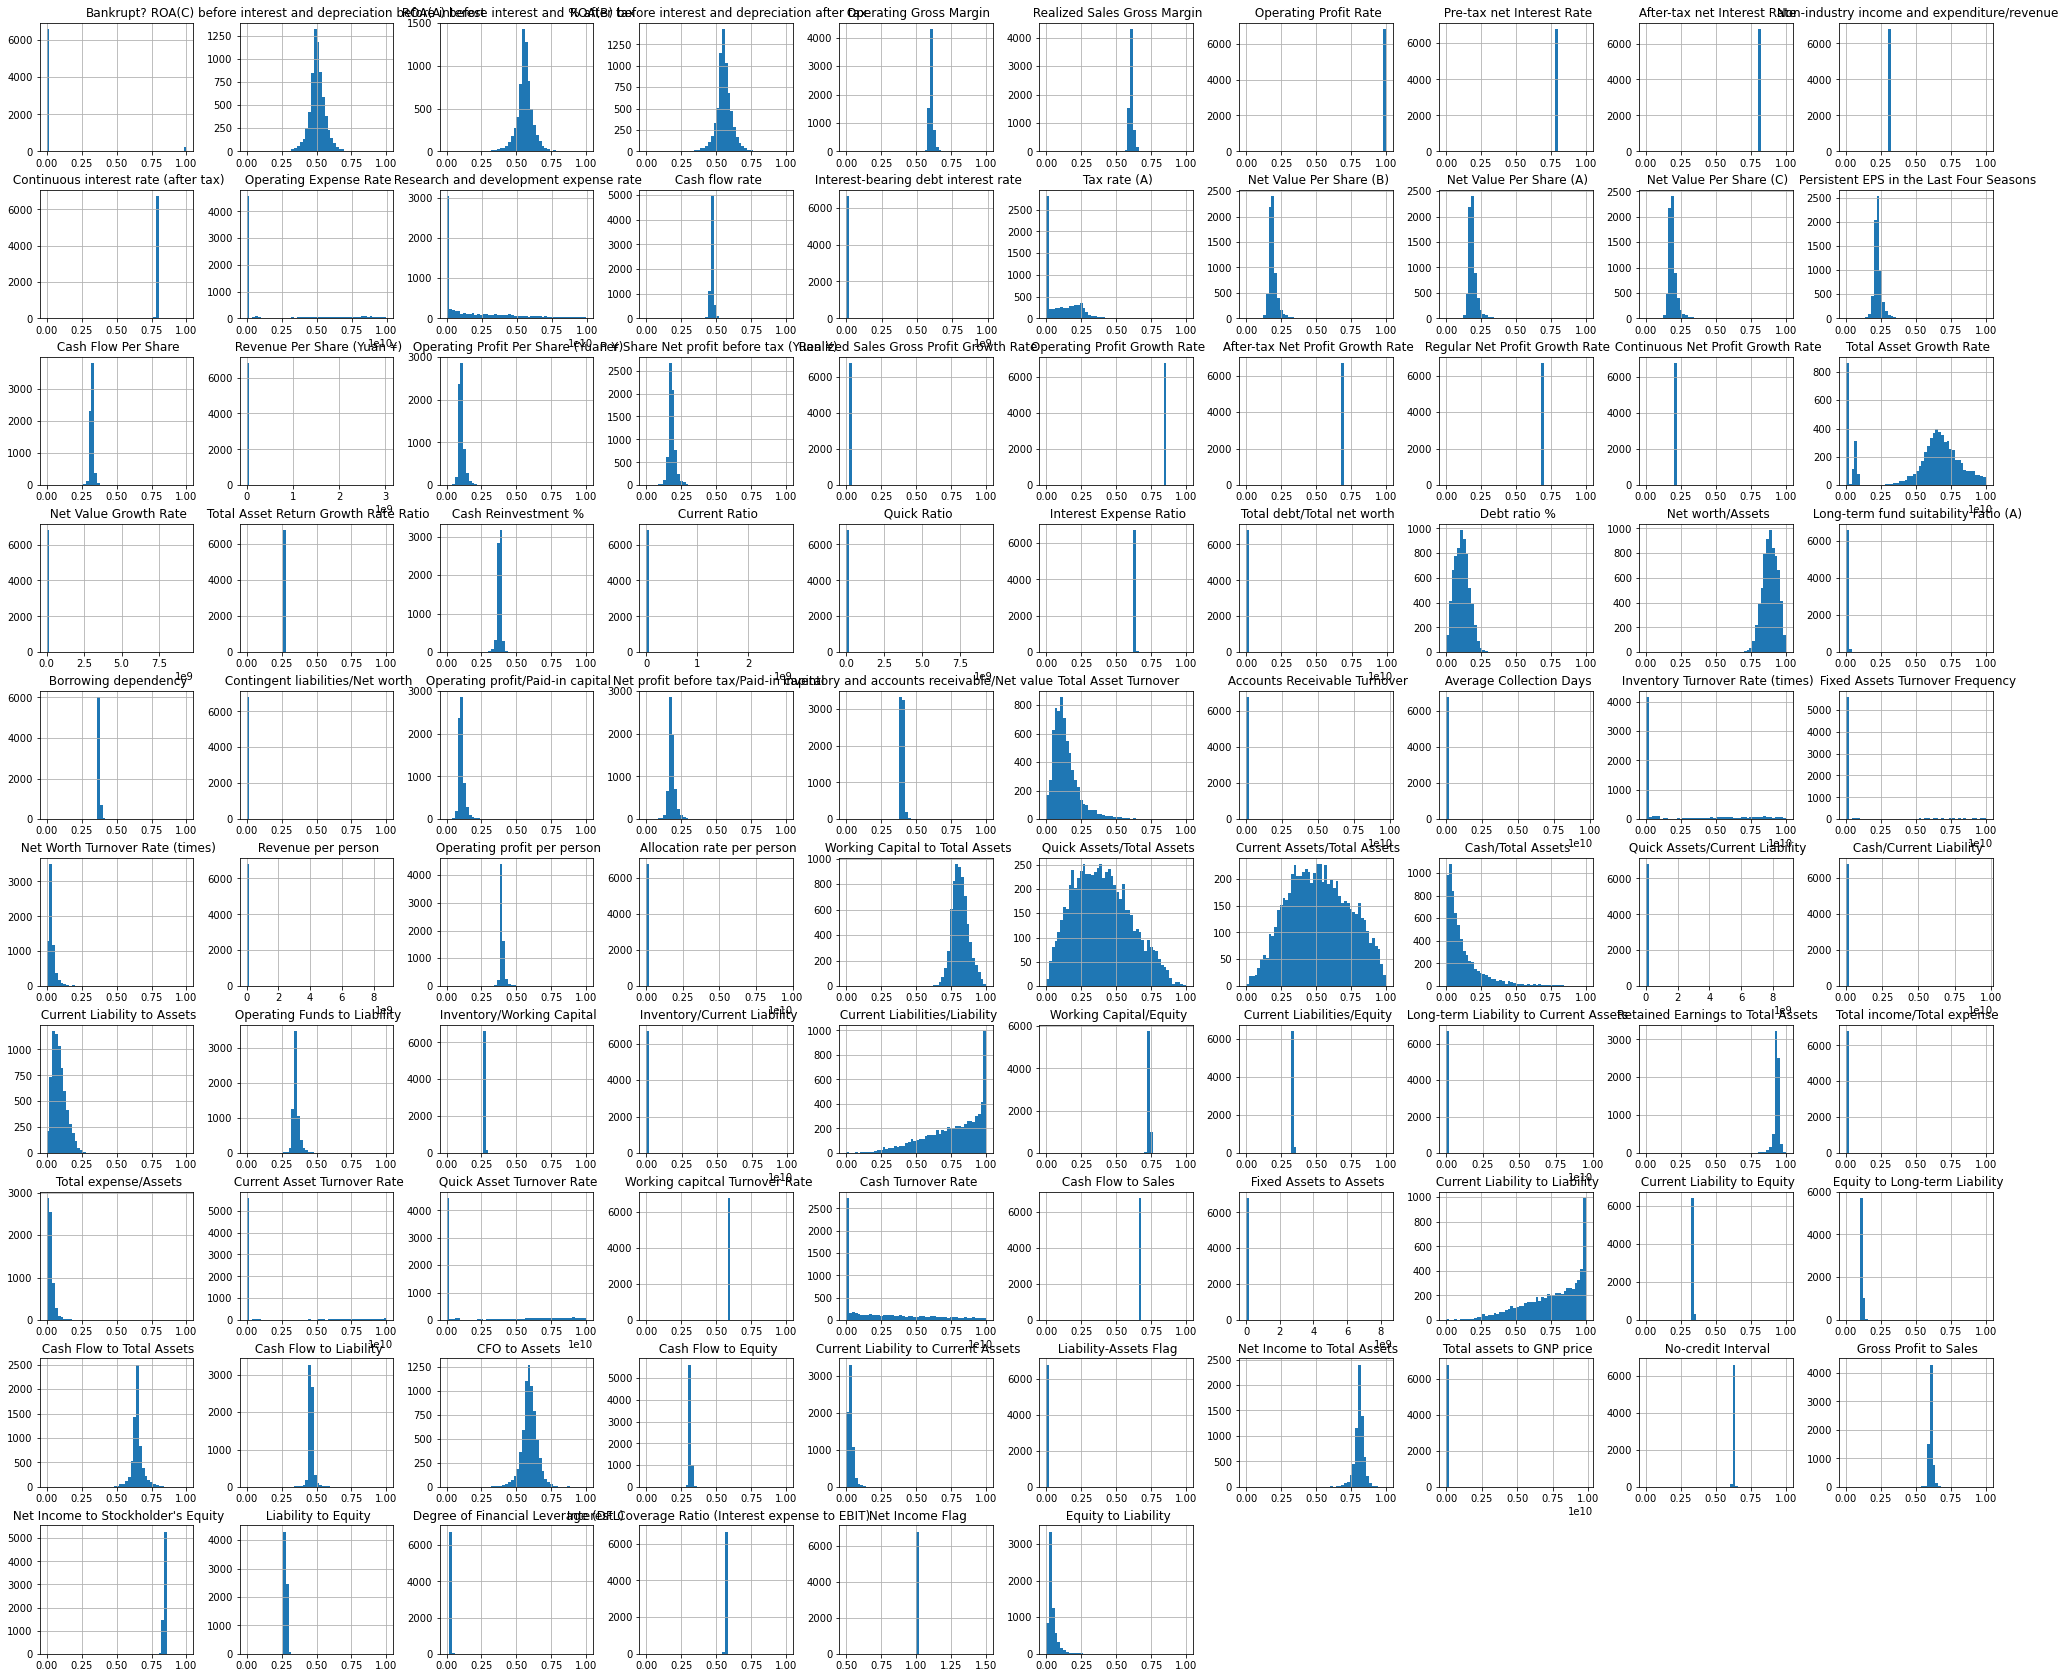

In [20]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

Ok, we can see that we do have a few nice bell curves in there, but quite a few of the figures appear to show some extreme outliers, and a few distributions skew heavily to one side or the other of the X axis. Let's see if we can remove some of the outliers to make our distributions look nicer.

Let's define a function that allows to pass in upper and lower cutoff values for our outliers so we can do somet testing.

In [71]:
def remove_outliers(lower_cutoff, upper_cutoff, df):

    for col in df:
        if str(col) == "Bankrupt?":
            continue
        col_name = str(col)
        q = df[col_name].quantile(upper_cutoff)
        df[df[col_name] < q]

        q_low = df[col_name].quantile(lower_cutoff)
        q_hi  = df[col_name].quantile(upper_cutoff)

        df_filtered = df[(df[col_name] < q_hi) & (df[col_name] > q_low)]
    

    return df_filtered

df_filtered = remove_outliers(.25, .75, df)
df_filtered.value_counts('Bankrupt?')

Bankrupt?
0    3372
1      37
dtype: int64

So removing the upper and lower 25% of the data seems to have cut off way too much. We barely have any bankrupt data points left. Let's try something else.

In [70]:
df_filtered = remove_outliers(.15, .85, df)
df_filtered.value_counts('Bankrupt?')

Bankrupt?
0    4701
1      72
dtype: int64

Looking better, but we'd still like more bankrupt data points.

In [103]:
df_filtered = remove_outliers(.05, .95, df)
df_filtered.value_counts('Bankrupt?')

Bankrupt?
0    5989
1     148
dtype: int64

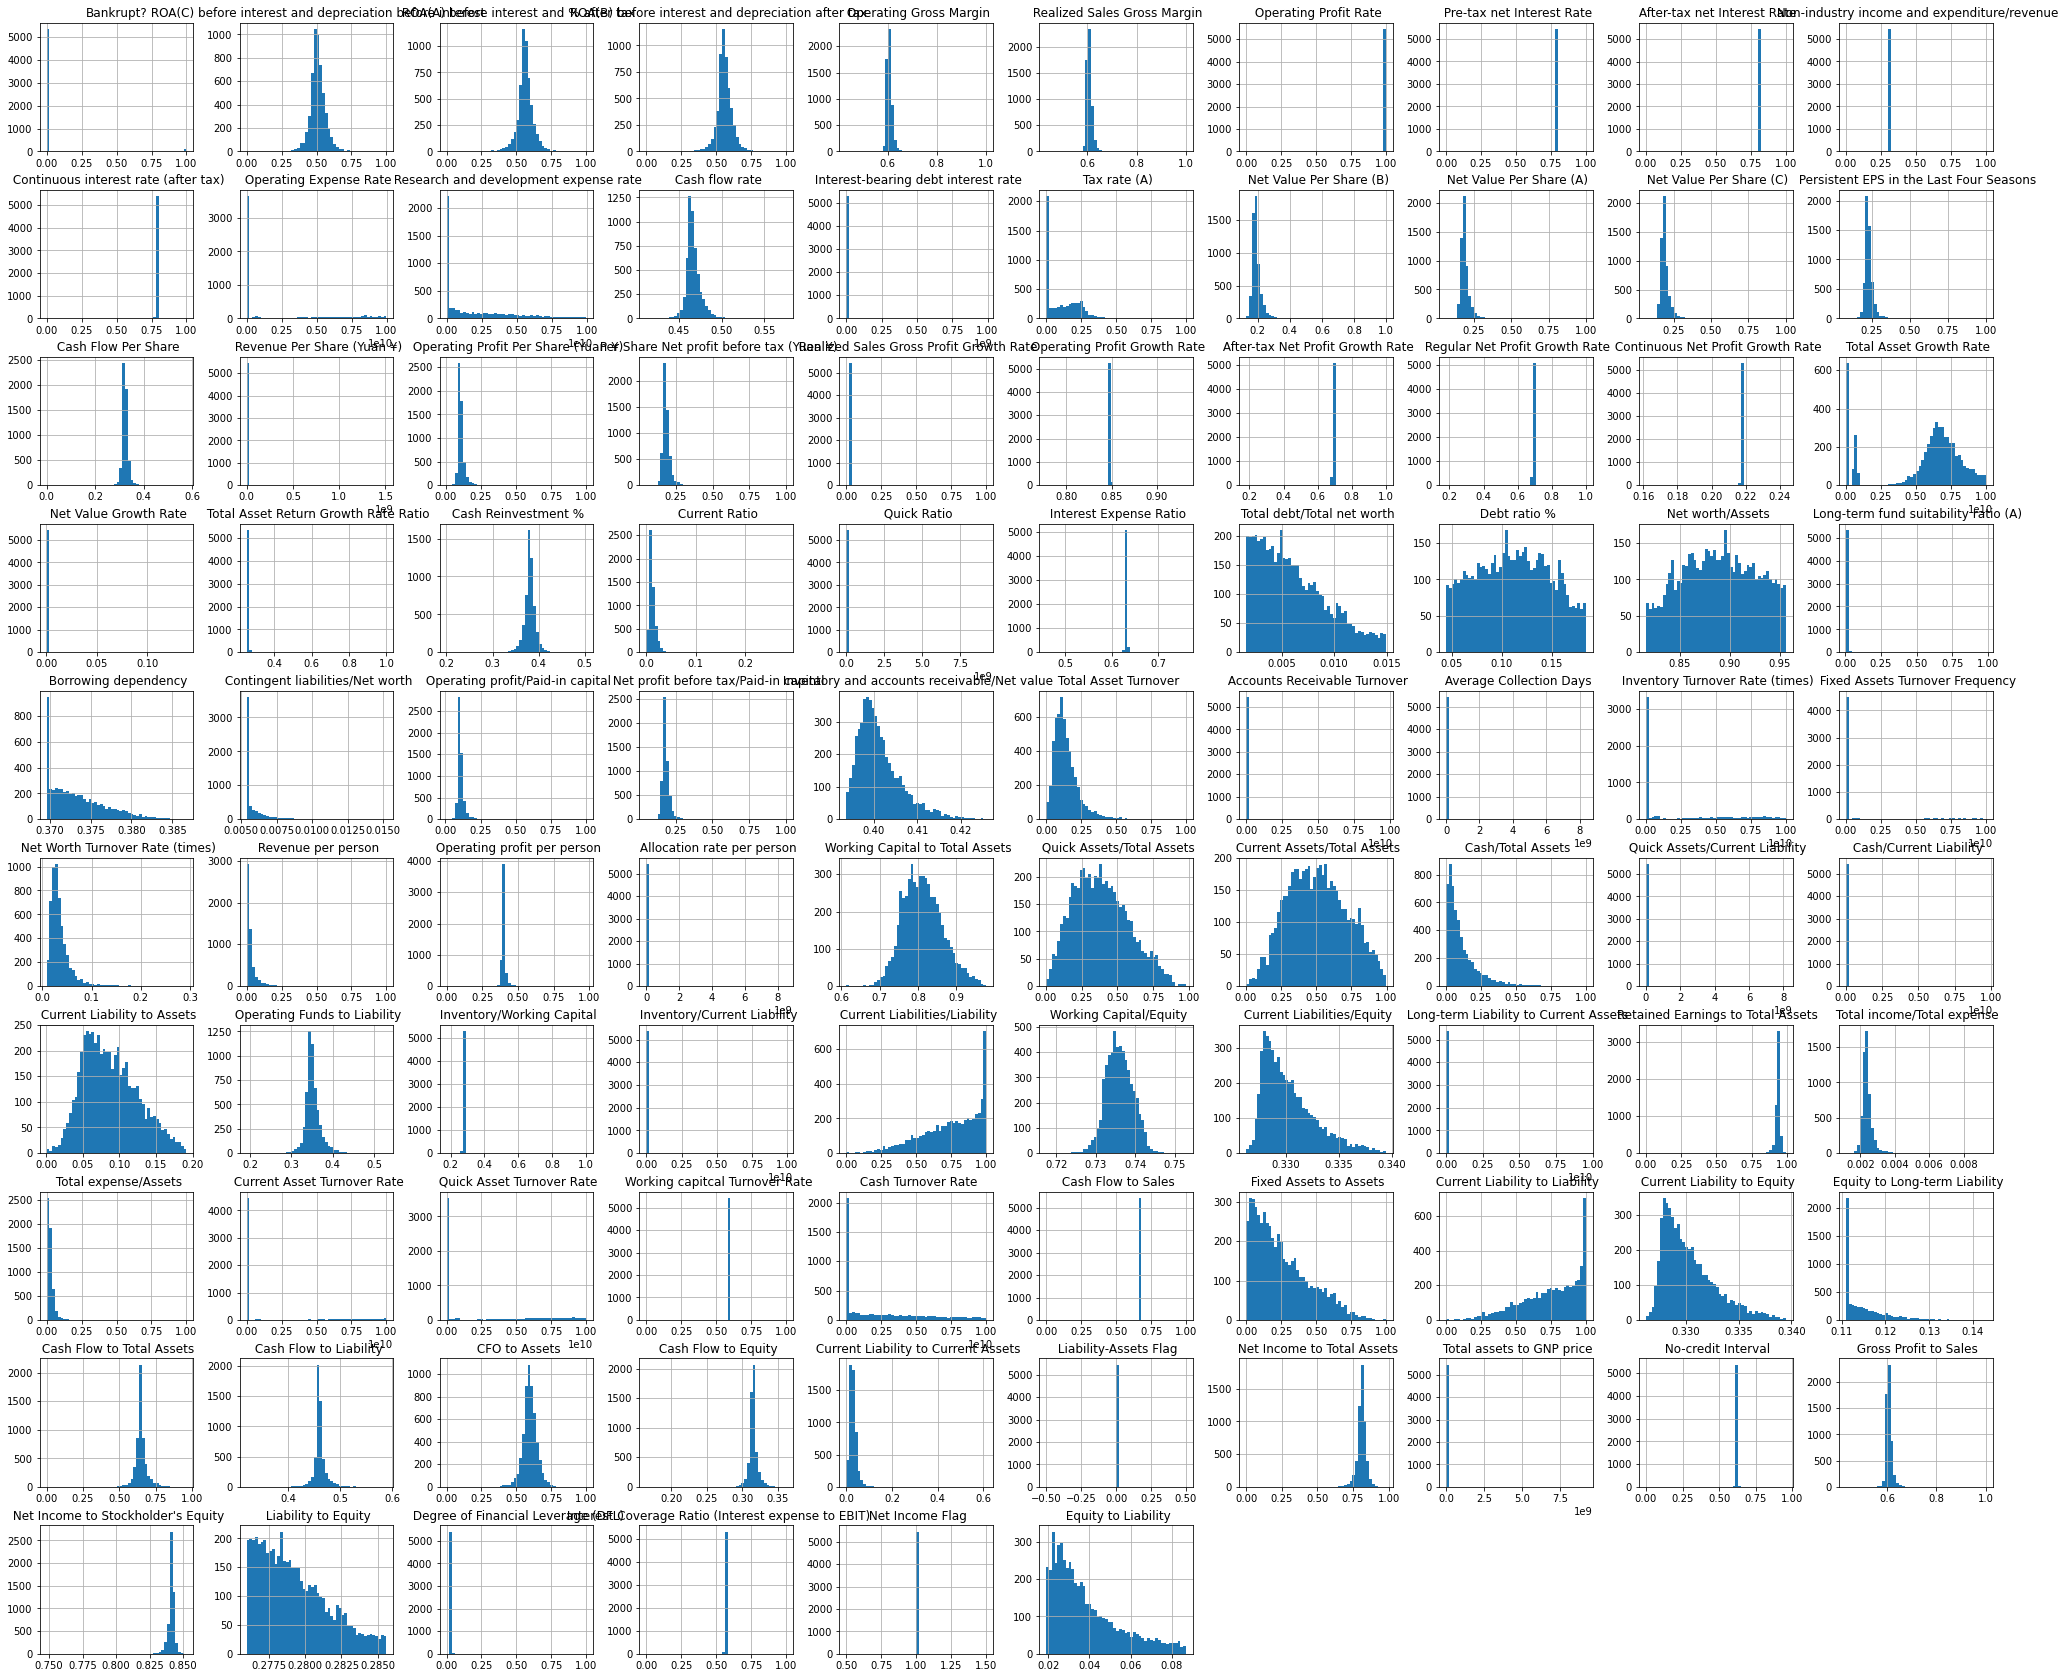

In [67]:
df_filtered.hist(figsize = (35,30), bins = 50)
plt.show()

Ok, that looks much better, but there's still a problem.

In [104]:
df_vals = df.value_counts("Bankrupt?")
df_filter_vals = df_filtered.value_counts("Bankrupt?")

print("New data containes " + str(round((df_filter_vals[0] / df_vals[0]),4) * 100) + "% of the non-bankrupt values compared to original.")
print("New data containes " + str(round((df_filter_vals[1] / df_vals[1]),4) * 100) + "% of the bankrupt values compared to original.")

New data containes 90.75999999999999% of the non-bankrupt values compared to original.
New data containes 67.27% of the bankrupt values compared to original.


Looks like we've removed way more bankrupt values than non-bankrupt values. This makes sense. Since bankrupt data comprises a much smaller percentage of the overall dataset, it is not surprising that it contains far more outliers.

In [105]:
df_filtered = remove_outliers(.01, .99, df)
df_filtered.value_counts('Bankrupt?')

Bankrupt?
0    6486
1     195
dtype: int64

In [106]:
df_vals = df.value_counts("Bankrupt?")
df_filter_vals = df_filtered.value_counts("Bankrupt?")

print("New data containes " + str(round((df_filter_vals[0] / df_vals[0]),4) * 100) + "% of the non-bankrupt values compared to original.")
print("New data containes " + str(round((df_filter_vals[1] / df_vals[1]),4) * 100) + "% of the bankrupt values compared to original.")

New data containes 98.29% of the non-bankrupt values compared to original.
New data containes 88.64% of the bankrupt values compared to original.


OK, so removing just 1% of the upper and lower outliers produces a much more palatable ratio. Let's stick with this for now.

## Investigating the removal of features and extreme outlier entries

Let's take a look at the difference in mean values for bankrupt vs non-bankrupt entries

95


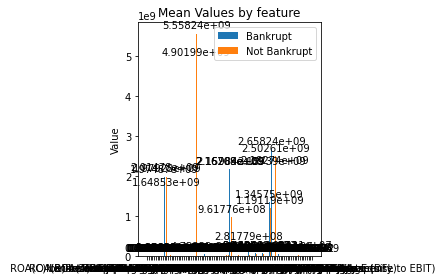

In [152]:
labels = df_filtered.columns.tolist()
means = df_filtered.groupby("Bankrupt?").mean()
bankrupt_means = means.iloc[1].tolist()
non_bankrupt_means = means.iloc[0].tolist()

labels.pop(0)


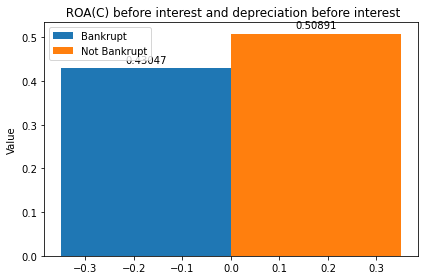

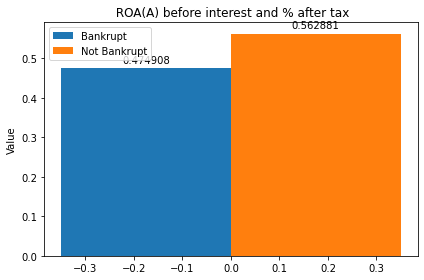

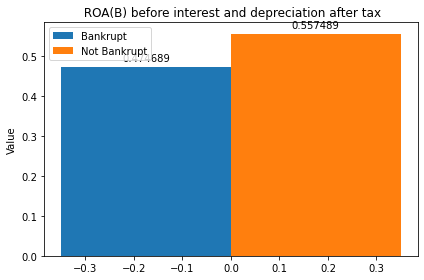

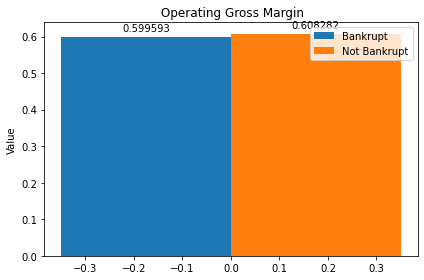

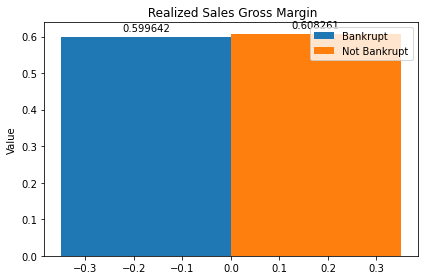

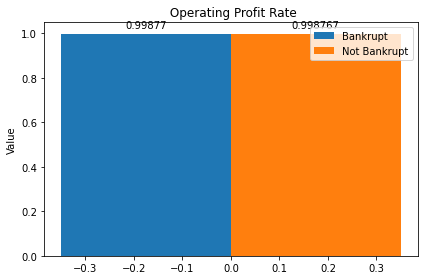

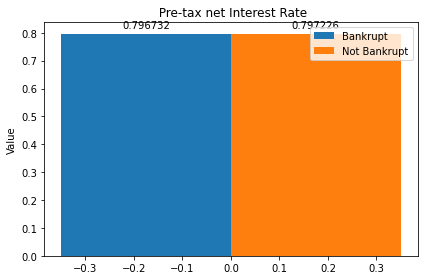

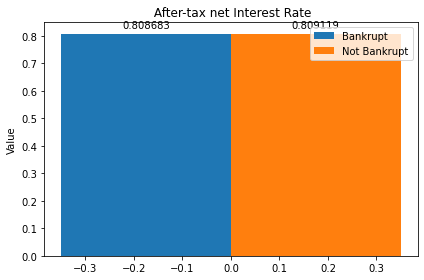

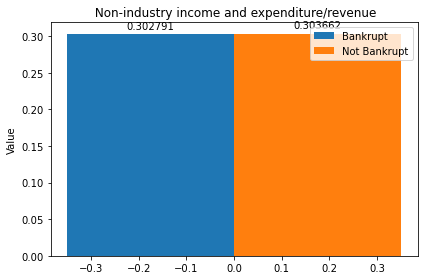

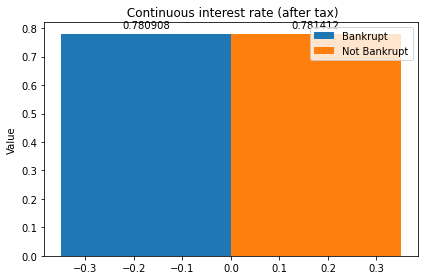

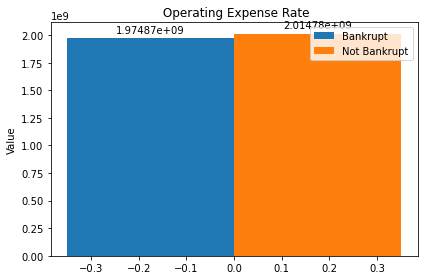

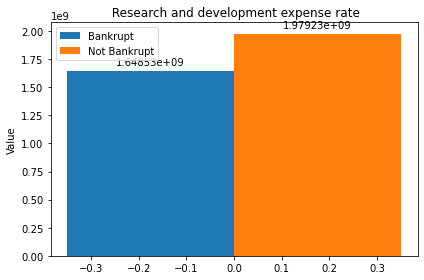

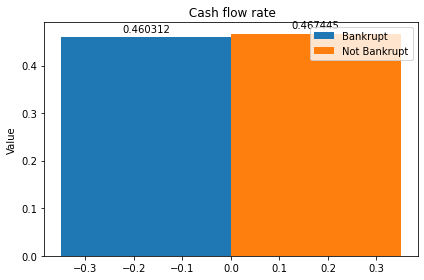

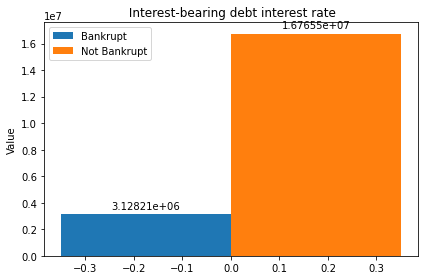

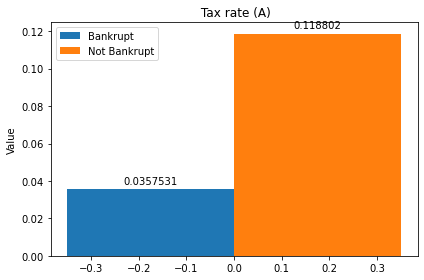

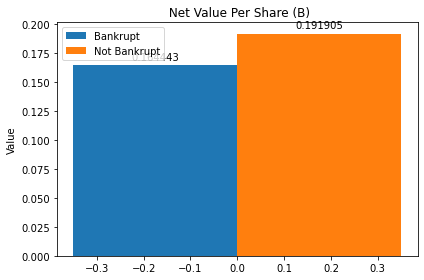

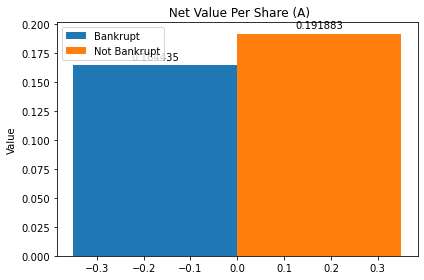

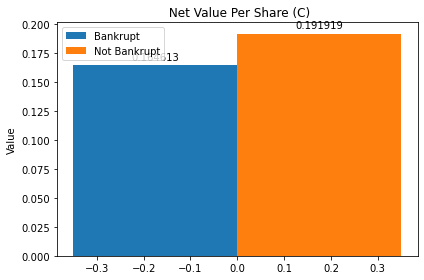

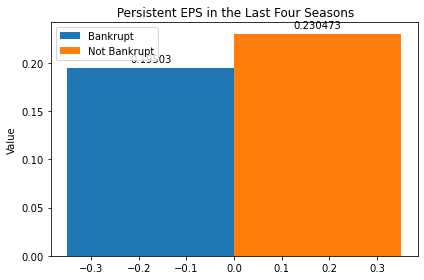

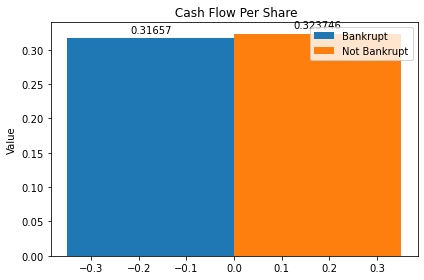

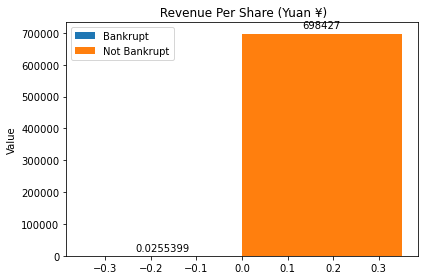

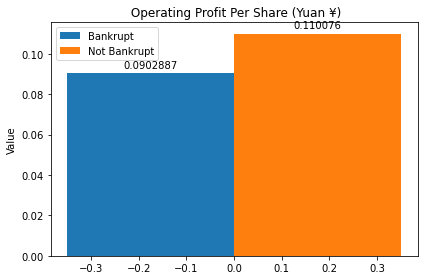

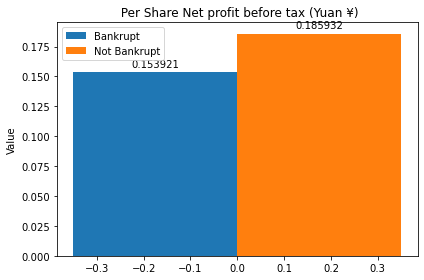

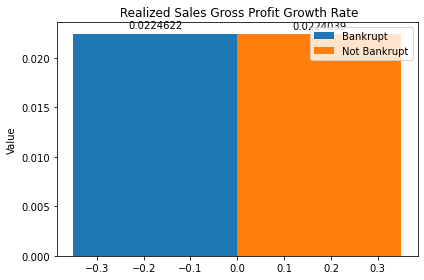

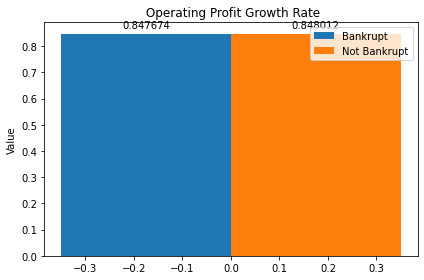

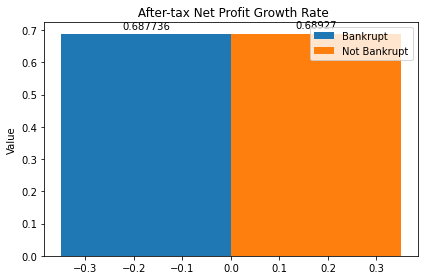

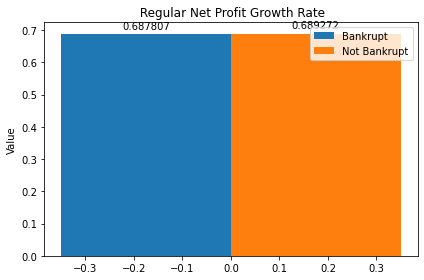

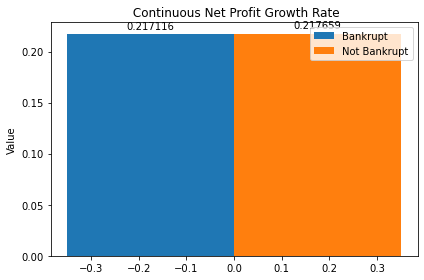

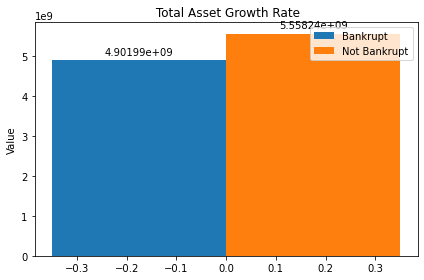

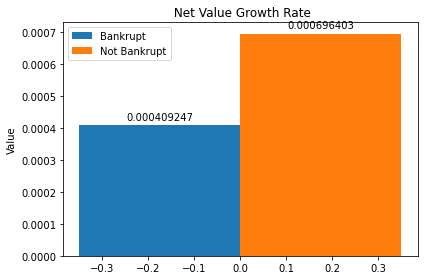

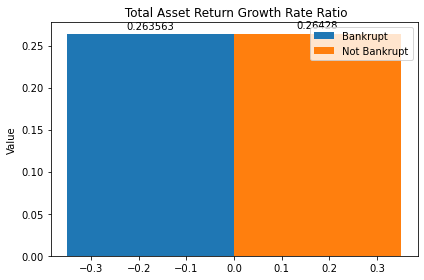

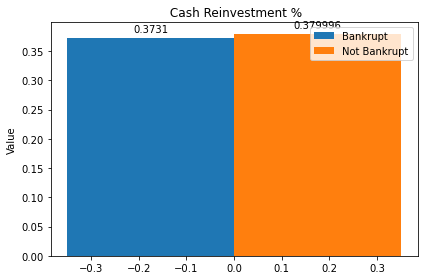

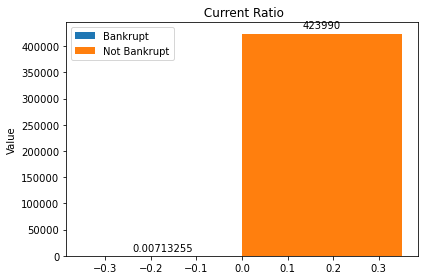

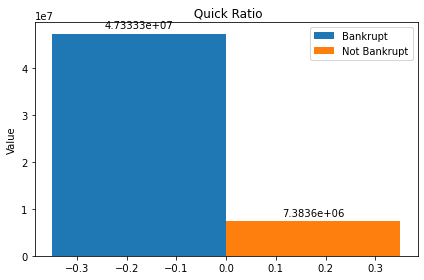

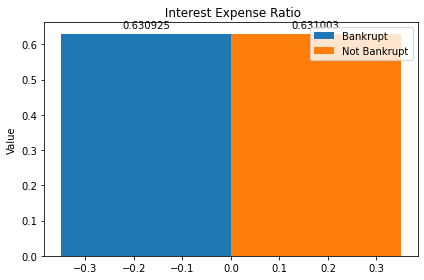

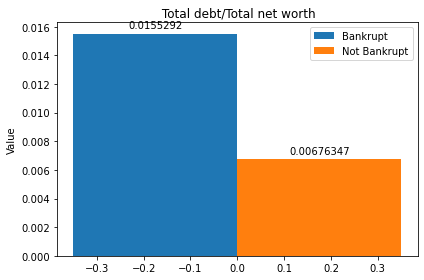

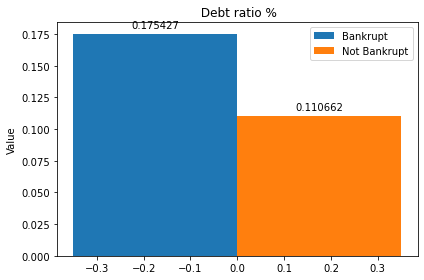

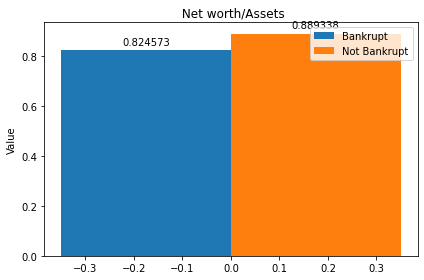

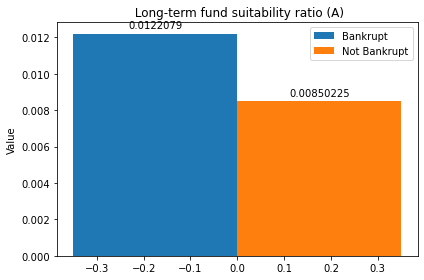

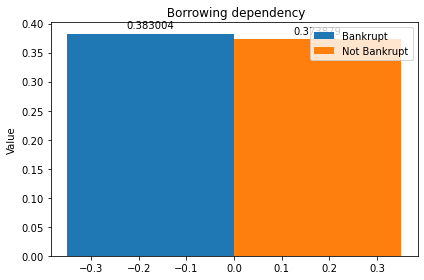

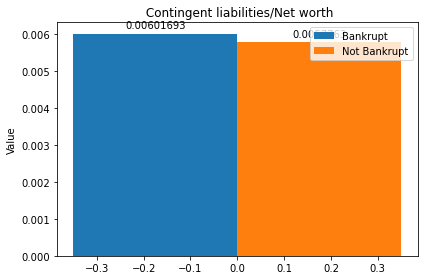

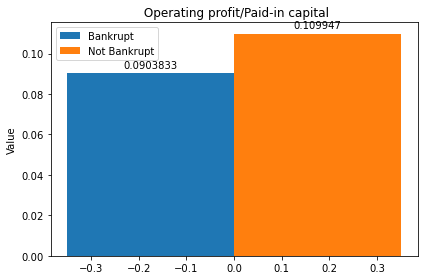

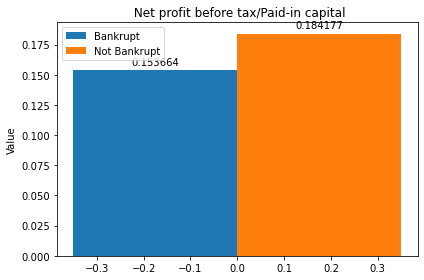

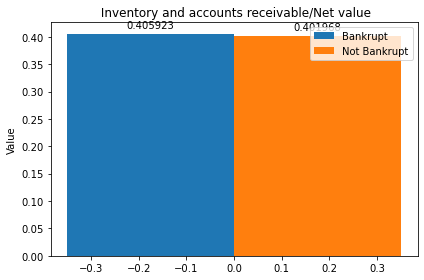

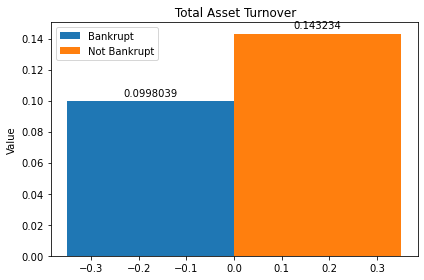

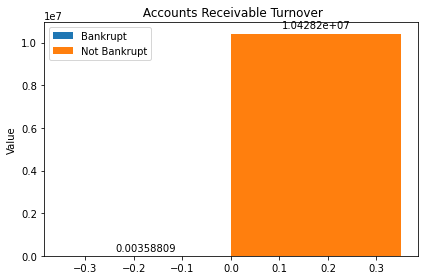

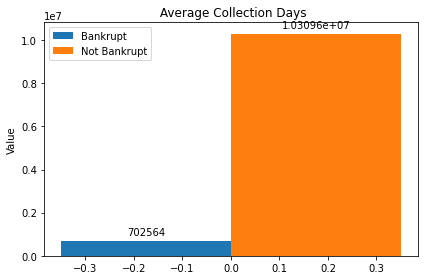

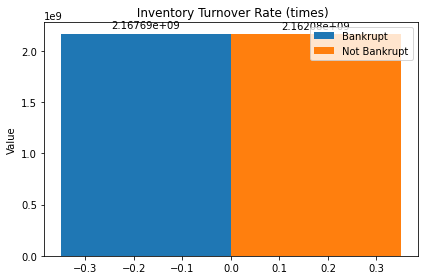

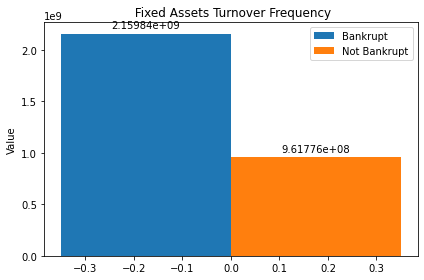

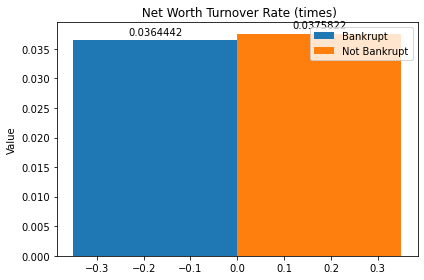

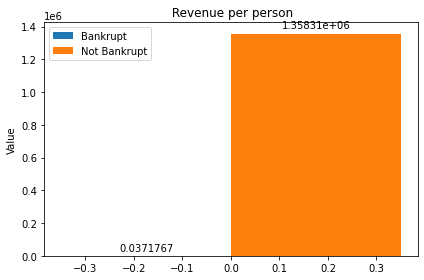

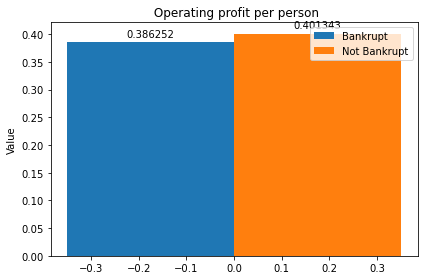

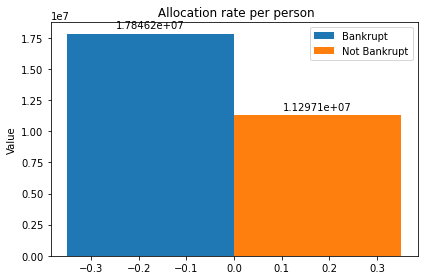

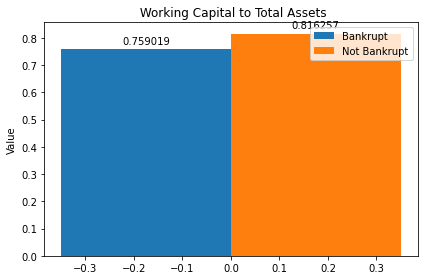

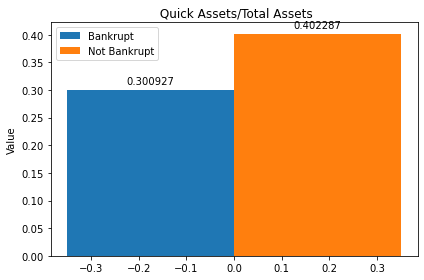

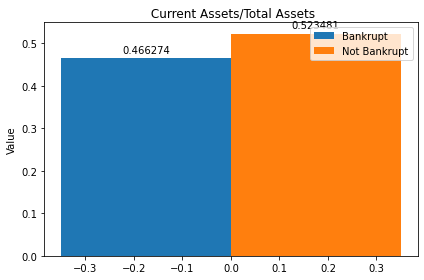

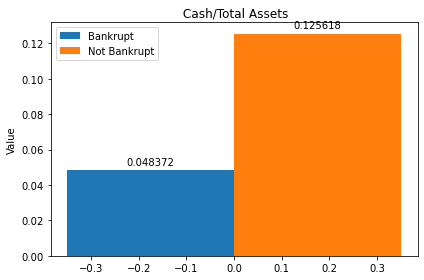

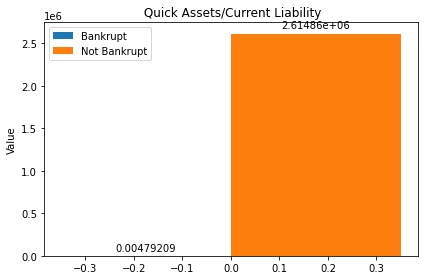

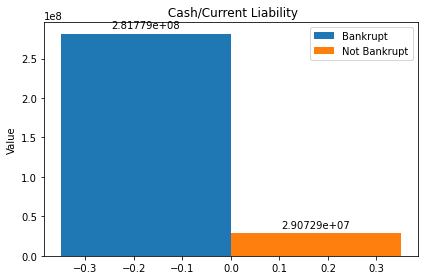

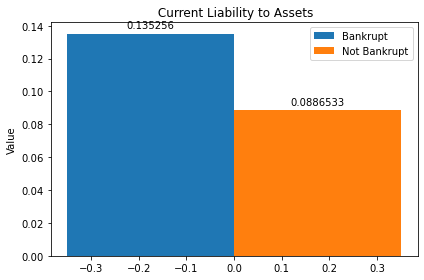

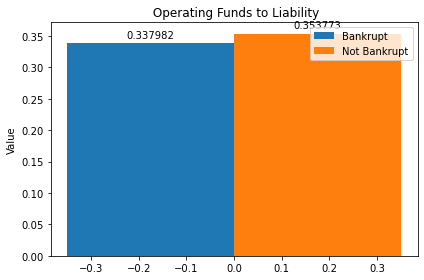

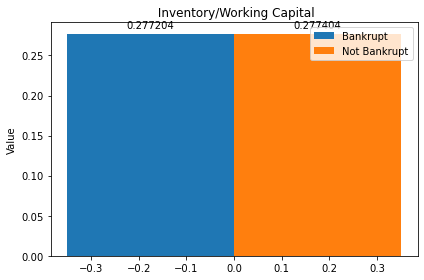

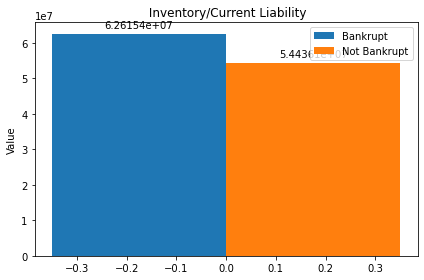

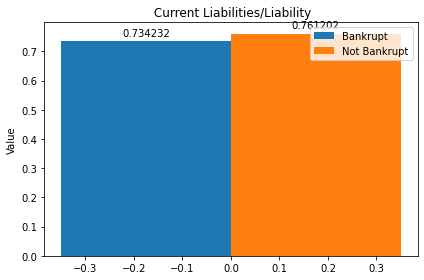

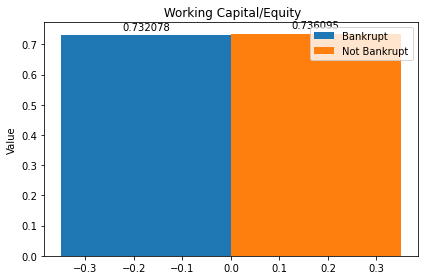

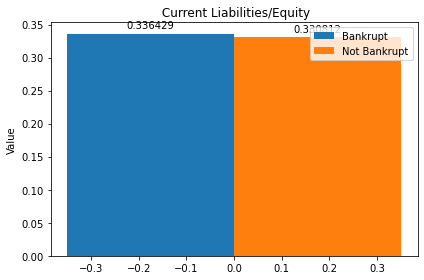

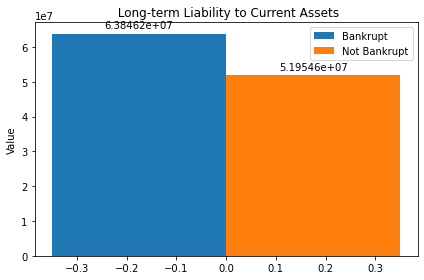

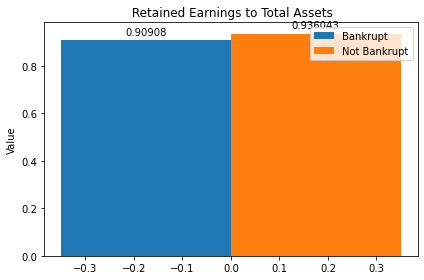

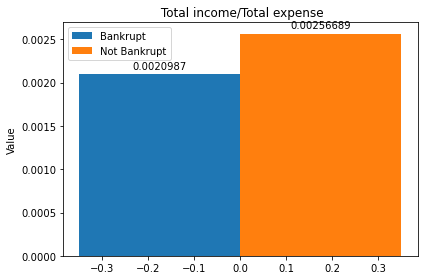

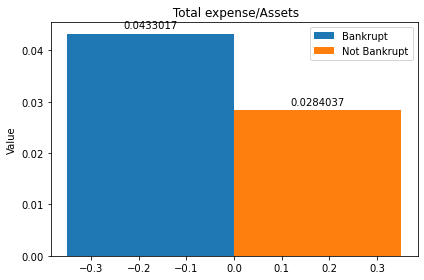

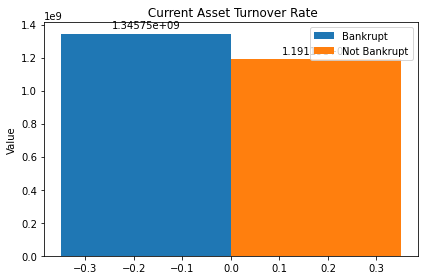

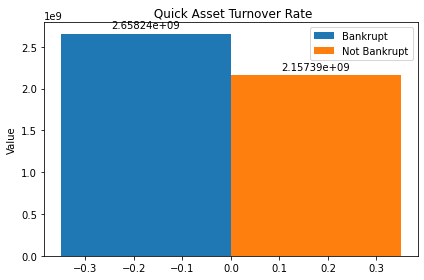

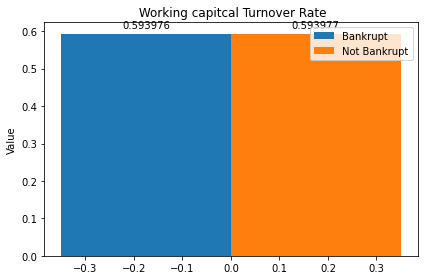

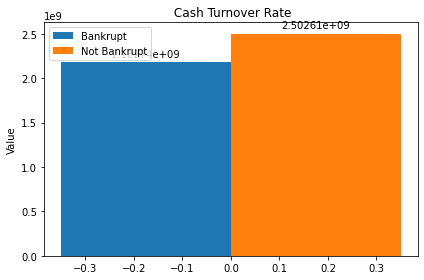

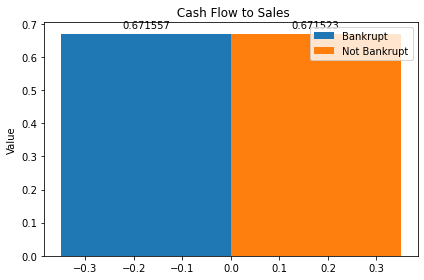

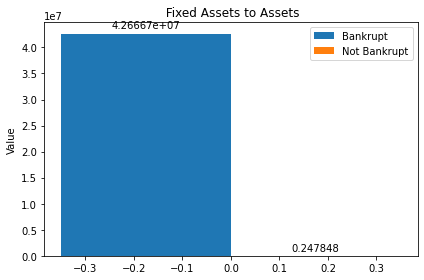

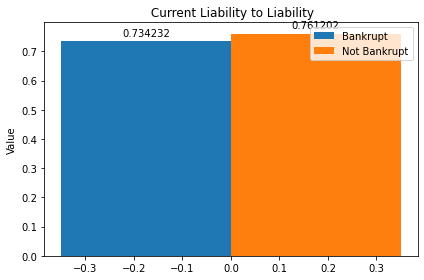

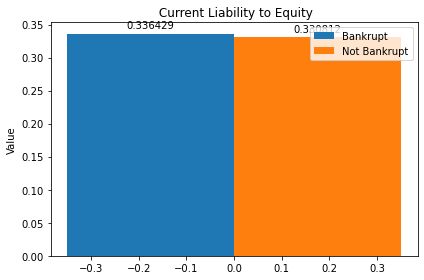

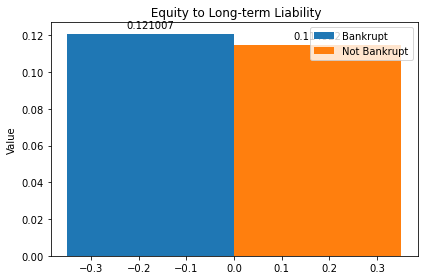

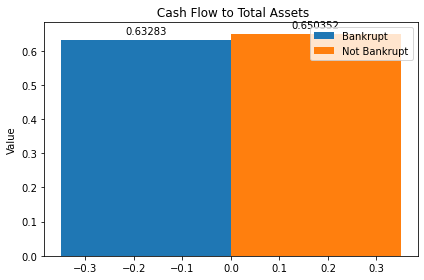

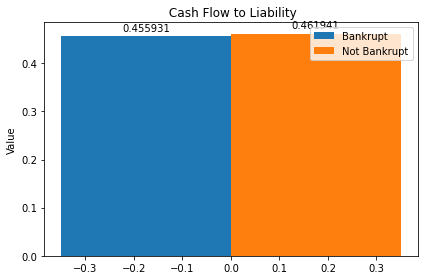

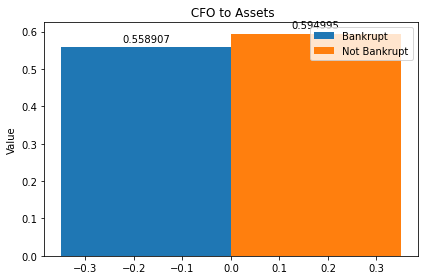

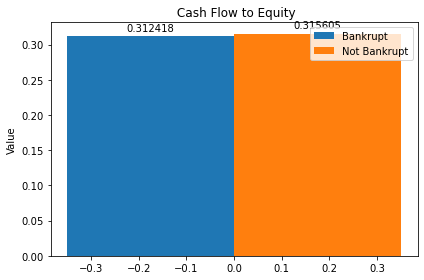

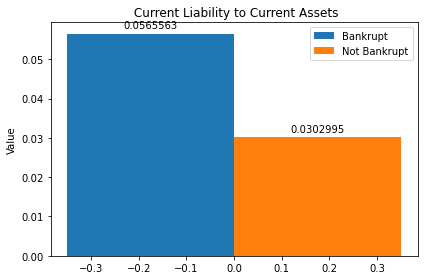

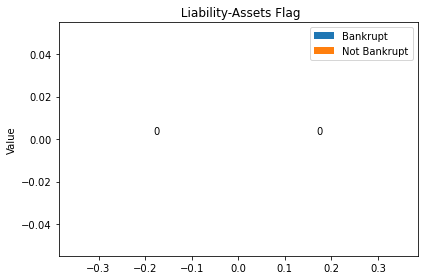

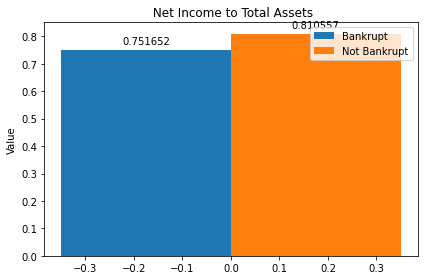

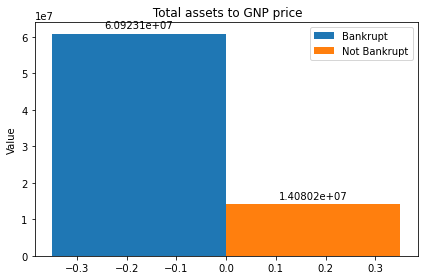

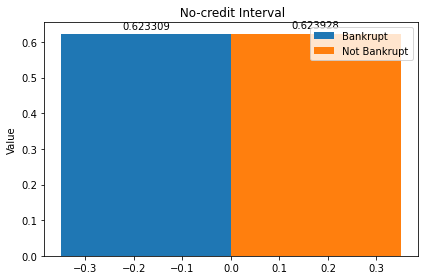

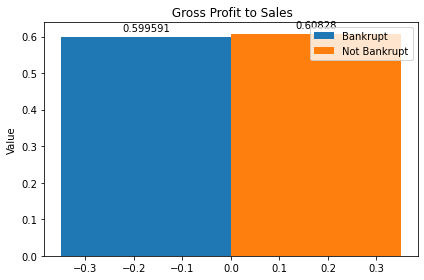

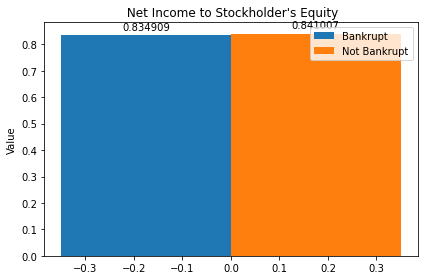

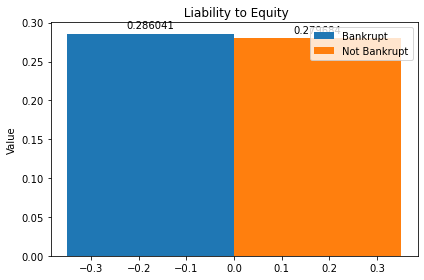

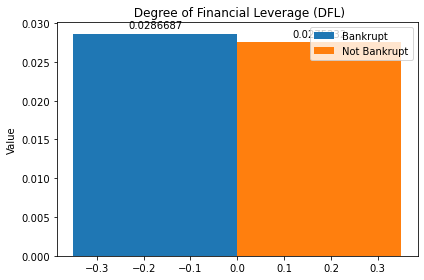

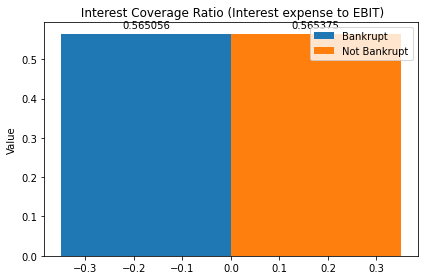

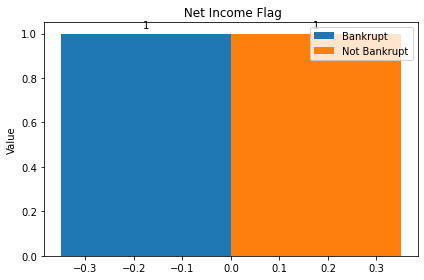

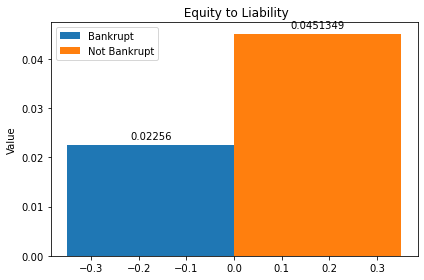

In [154]:
for i, label in enumerate(labels):
    x = np.arange(1)
    width=0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, bankrupt_means[i], width, label='Bankrupt')
    rects2 = ax.bar(x + width/2, non_bankrupt_means[i], width, label='Not Bankrupt')

    ax.set_ylabel('Value')
    ax.set_title(label)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()
    

As we can see, there are many features in which the mean values for both bankrupt and non-bankrupt are extremely similar. Let's remove those.

In [170]:
df_filtered_reduced = df_filtered

for k, label in enumerate(labels):
    if abs(non_bankrupt_means[k] - bankrupt_means[k]) < .001:
        df_filtered_reduced = df_filtered_reduced.drop(label, axis=1)
    

In [171]:
df_filtered_reduced

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Expense Rate   Research and development expense rate  \
0                1.256969e-04                            0.000000e+00   
1                2.897851e-04                            0.000000e+00   
2                2.361297e-04                            2.550000e+07   
3                1.078888e-04                            0.000000e+00   
4                7.890000e+09                            0.000000e+00   
...                       ...                                     ...   
6814             1.510213e-04                            4.500000e+09   
6815             5.220000e+09                            1.440000e+09   
6816             2.509312e-04                            1.039086e-04   
6817             1.236154e-04                            2.510000e+09   
6818             1.431695e-03                            0.000000e+00   

       Cash flow rate   Interest-bearing debt interest rate  ...  \
0            0.458143                          7.250725e-04  ...   
1

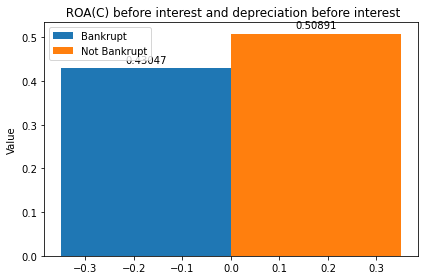

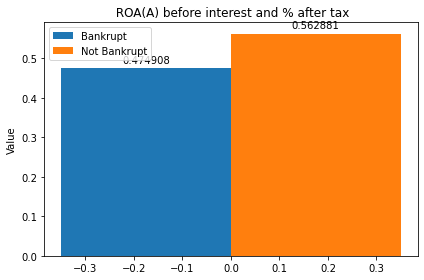

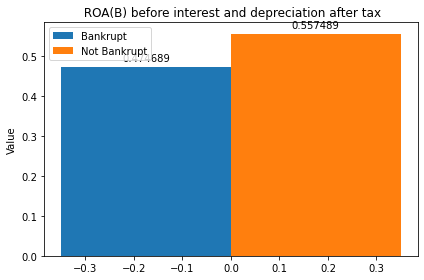

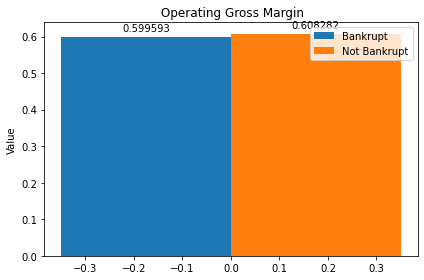

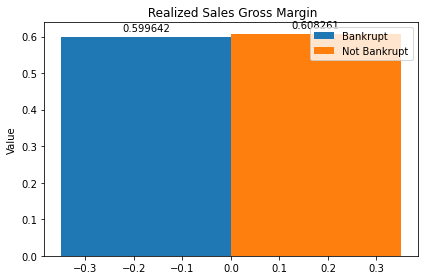

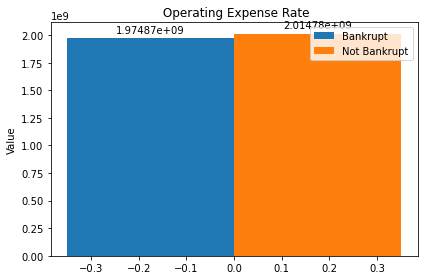

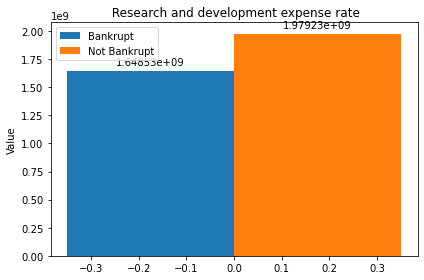

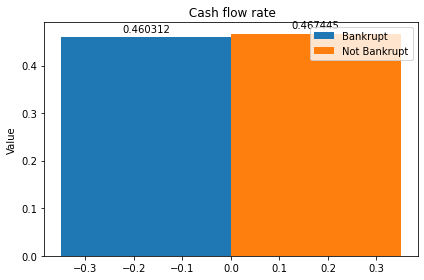

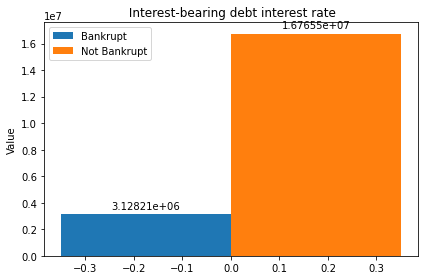

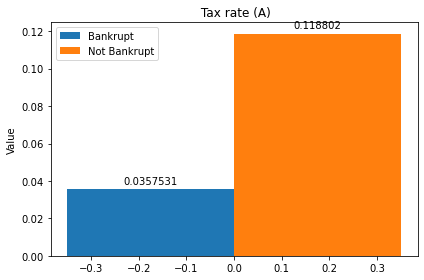

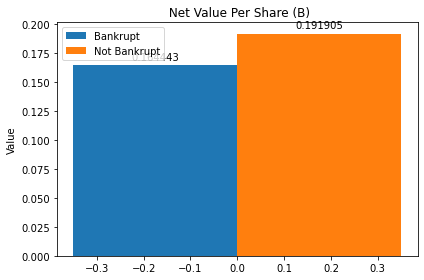

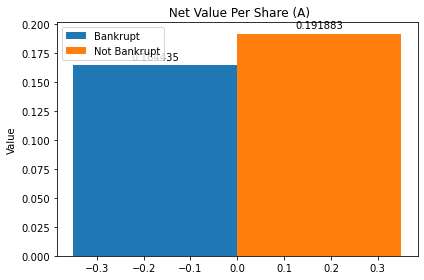

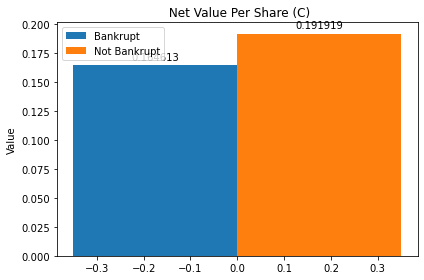

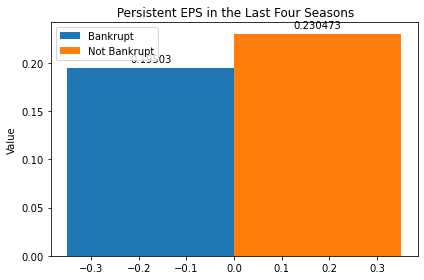

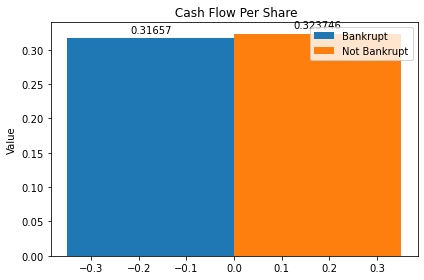

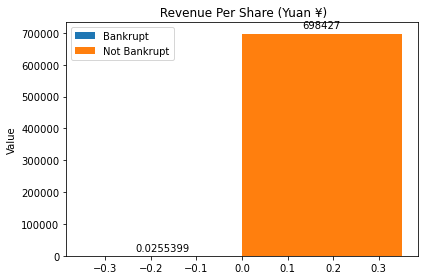

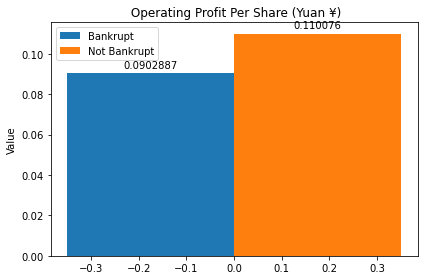

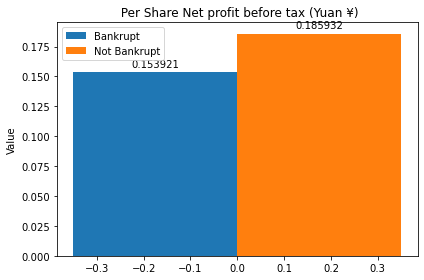

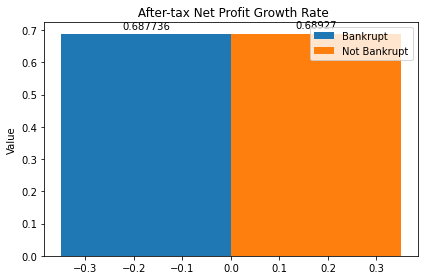

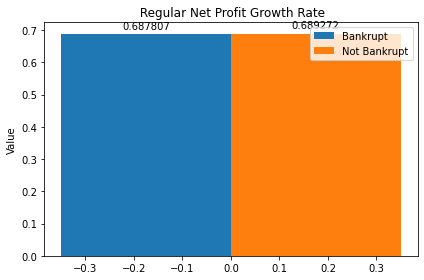

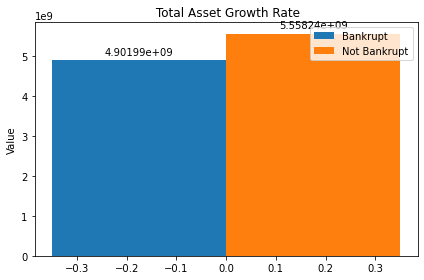

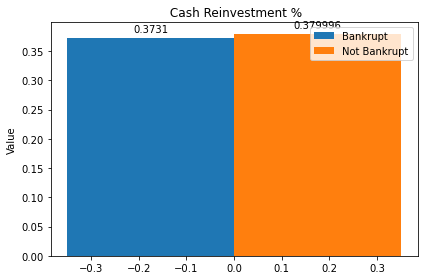

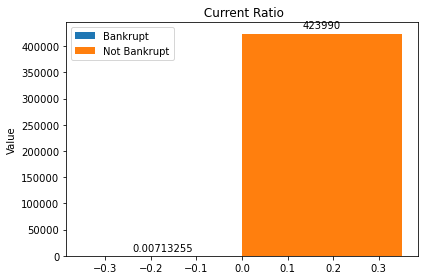

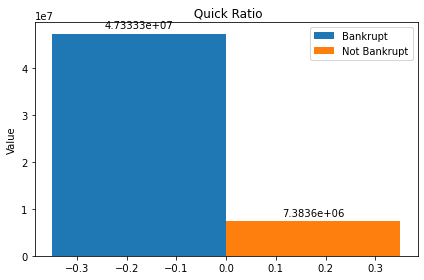

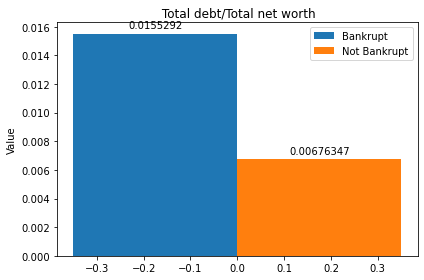

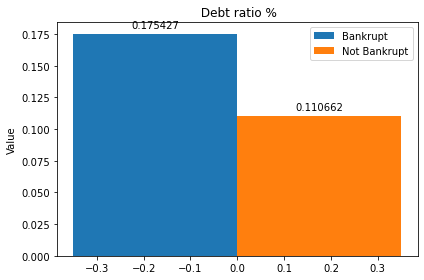

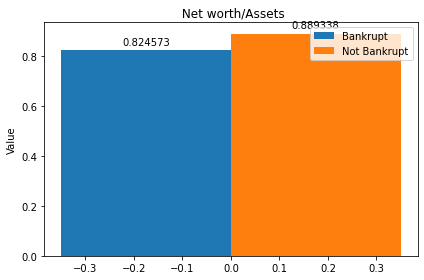

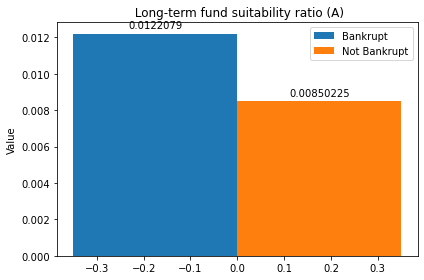

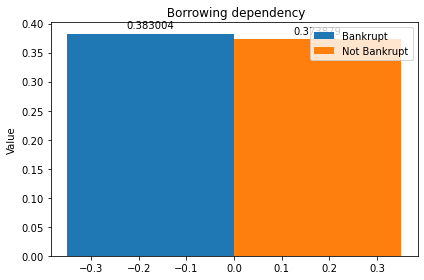

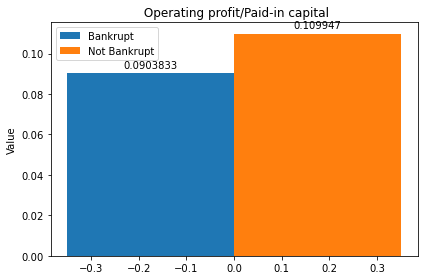

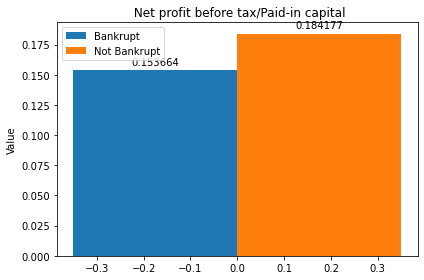

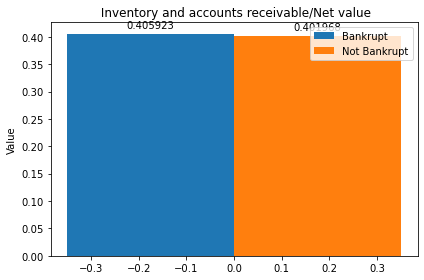

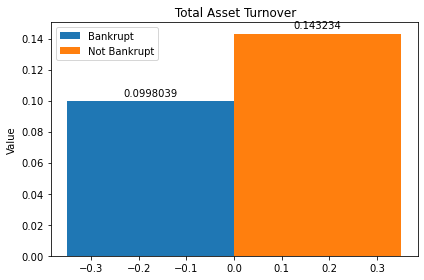

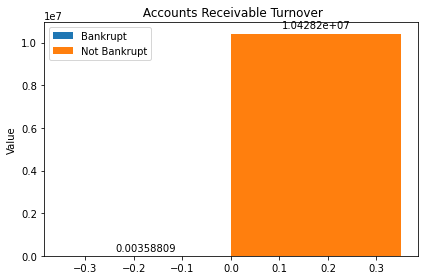

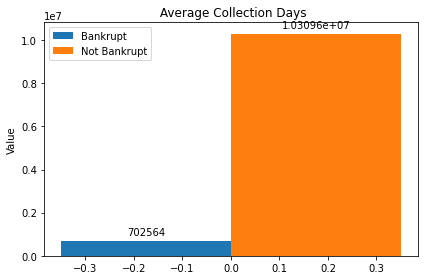

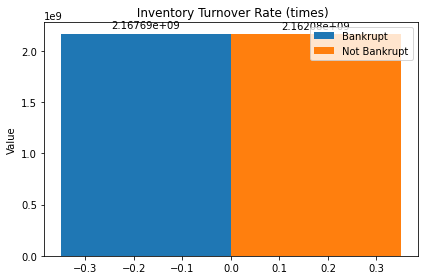

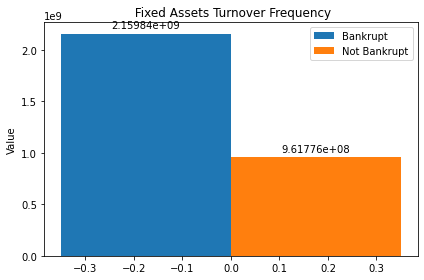

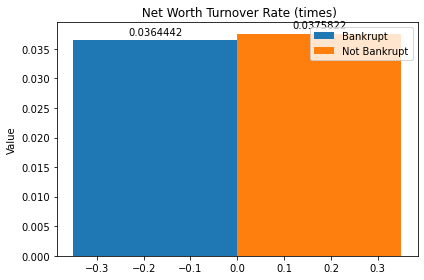

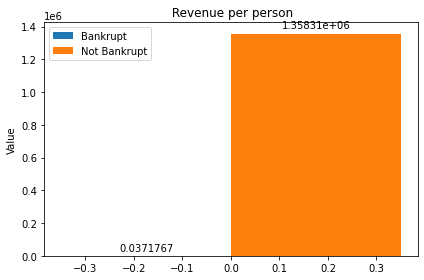

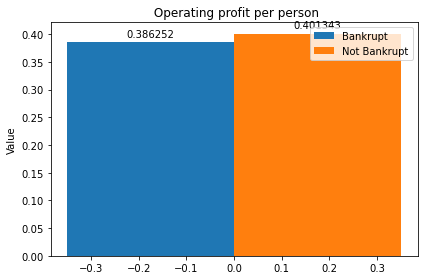

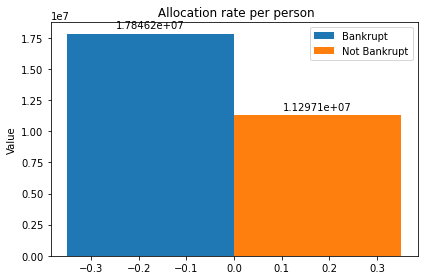

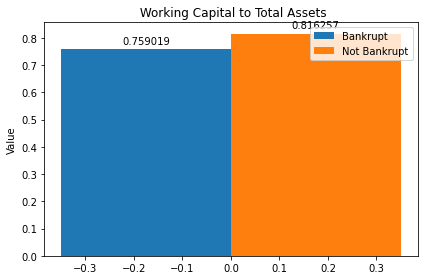

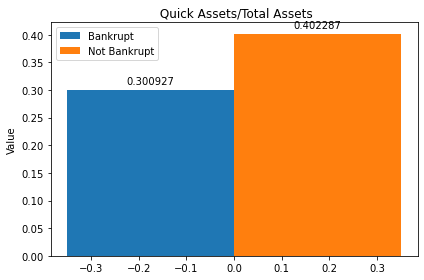

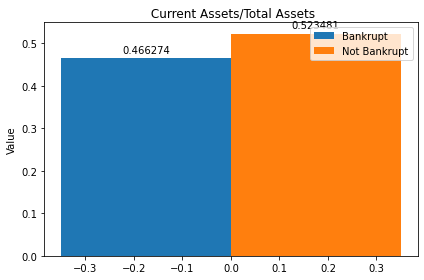

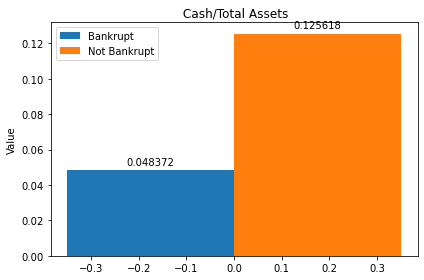

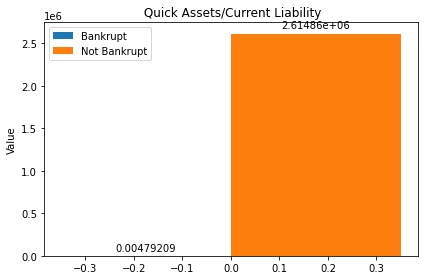

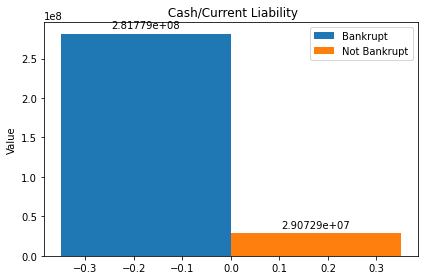

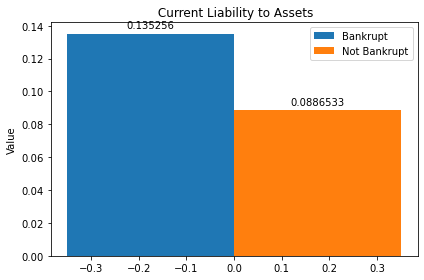

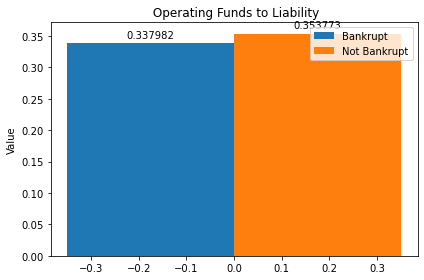

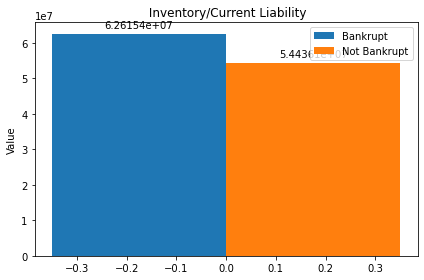

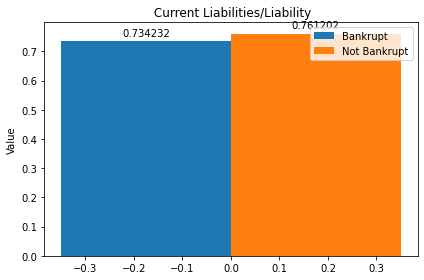

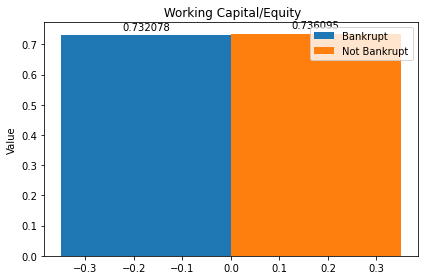

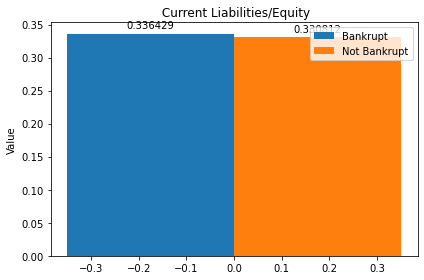

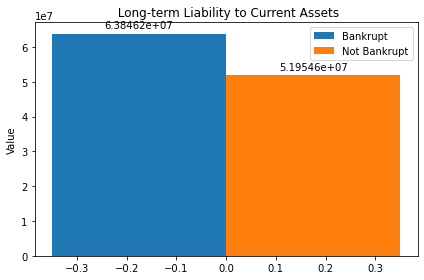

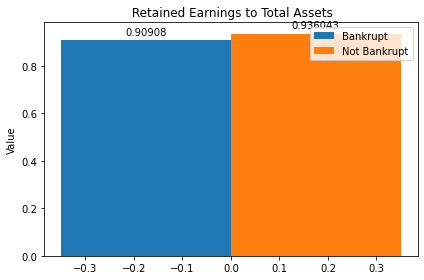

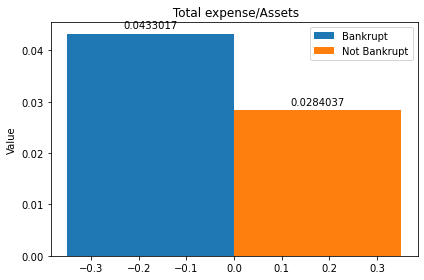

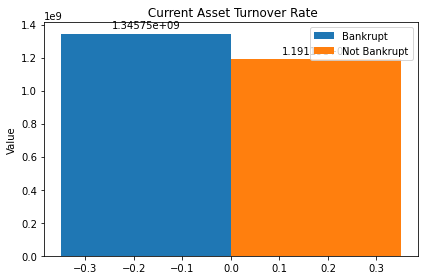

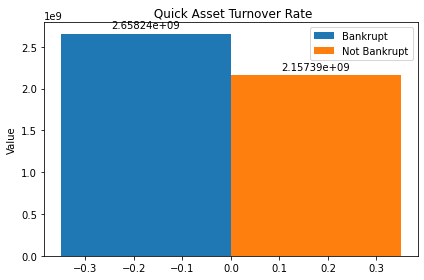

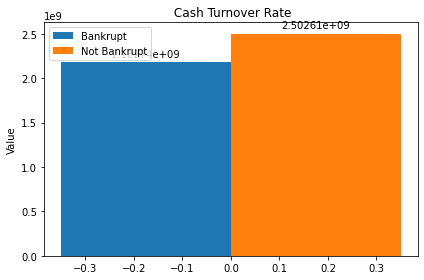

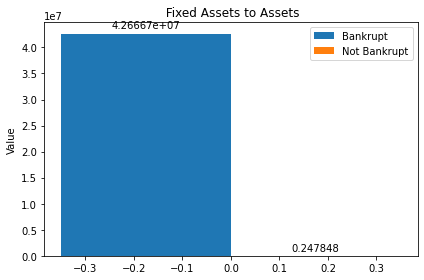

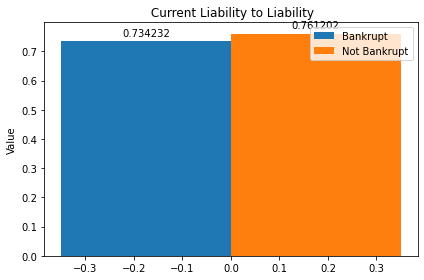

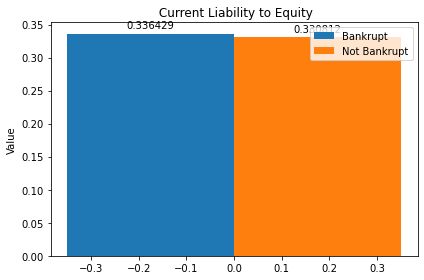

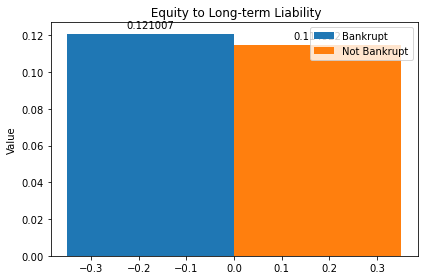

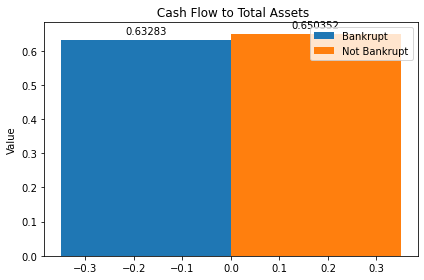

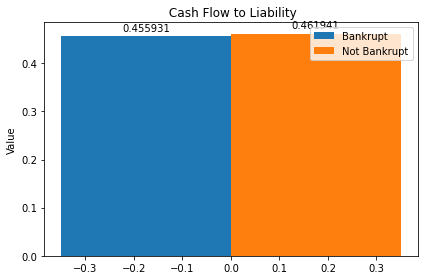

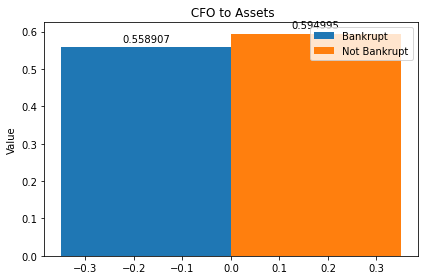

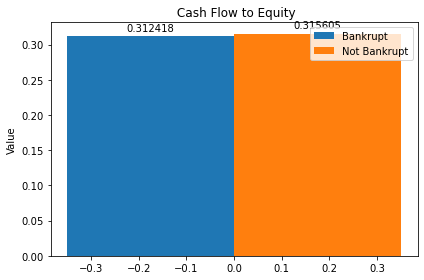

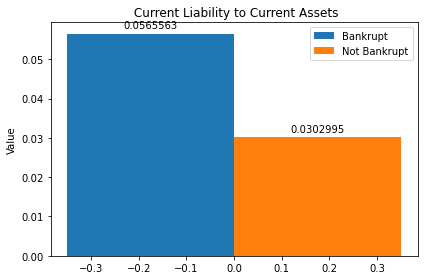

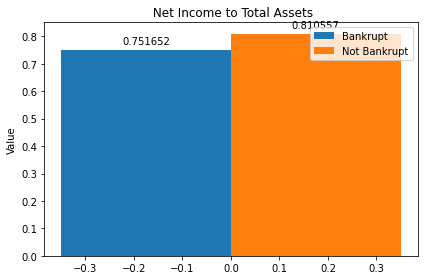

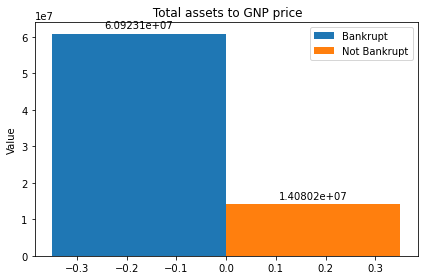

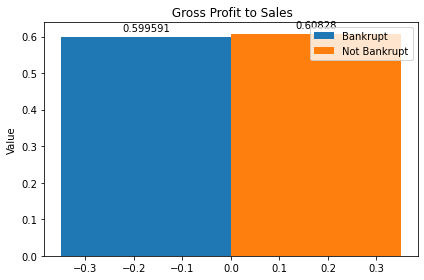

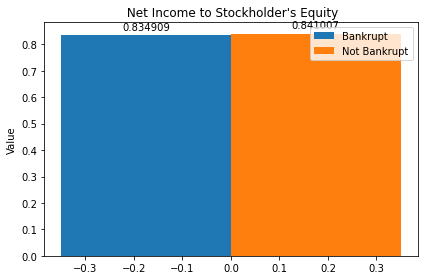

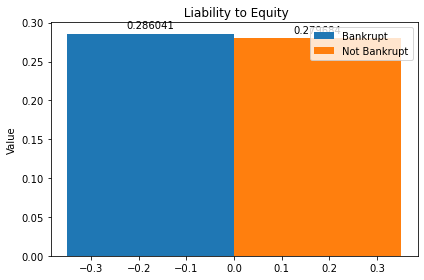

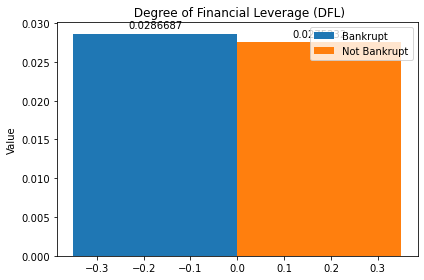

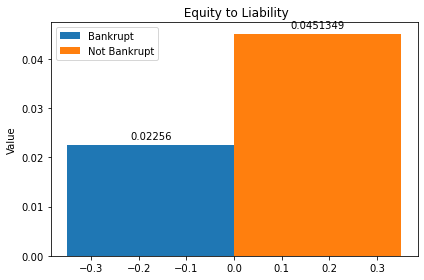

In [177]:
labels = df_filtered_reduced.columns.tolist()
means = df_filtered_reduced.groupby("Bankrupt?").mean()
bankrupt_means = means.iloc[1].tolist()
non_bankrupt_means = means.iloc[0].tolist()

labels.pop(0)
for i, label in enumerate(labels):
    
    x = np.arange(1)
    width=0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, bankrupt_means[i], width, label='Bankrupt')
    rects2 = ax.bar(x + width/2, non_bankrupt_means[i], width, label='Not Bankrupt')

    ax.set_ylabel('Value')
    ax.set_title(label)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

We've removed all the features whose mean values were less than 0.001 to each other, which reduced our feature set by 19! This should make training a bit easier.

We still have some weird anomalies in the data. For example, Revenue Per Share (Yuan ¥) has some extreme outliers.

In [193]:
print("Revenue Per Share Mean: " + str(df_filtered_reduced[' Revenue Per Share (Yuan ¥)'].mean()))
print("Revenue Per Share Median: " + str(df_filtered_reduced[' Revenue Per Share (Yuan ¥)'].median()))

high_vals = df_filtered_reduced[' Revenue Per Share (Yuan ¥)'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Revenue Per Share Mean: 678042.2478150058
Revenue Per Share Median: 0.0275118350802366
Value counts--False represents values under 1, True represents values over 1


False    6678
True        3
Name:  Revenue Per Share (Yuan ¥), dtype: int64

So we've got just 3 entries for this feature causing our mean value to be out of whack. Let's get rid of them.

In [197]:
df_filtered_reduced = df_filtered_reduced[(df_filtered_reduced[" Revenue Per Share (Yuan ¥)"] < 1)]

print("Revenue Per Share Mean: " + str(df_filtered_reduced[' Revenue Per Share (Yuan ¥)'].mean()))
print("Revenue Per Share Median: " + str(df_filtered_reduced[' Revenue Per Share (Yuan ¥)'].median()))

high_vals = df_filtered_reduced[' Revenue Per Share (Yuan ¥)'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Revenue Per Share Mean: 0.03858221639393435
Revenue Per Share Median: 0.02750427272864775
Value counts--False represents values under 1, True represents values over 1


False    6678
Name:  Revenue Per Share (Yuan ¥), dtype: int64

Much better! Now we are going to do the same for Current Ratio.

In [198]:
print("Current Ratio Mean: " + str(df_filtered_reduced[' Current Ratio'].mean()))
print("Current Ratio Median: " + str(df_filtered_reduced[' Current Ratio'].median()))

high_vals = df_filtered_reduced[' Current Ratio'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Current Ratio Mean: 411799.9541687744
Current Ratio Median: 0.0105871744549939
Value counts--False represents values under 1, True represents values over 1


False    6677
True        1
Name:  Current Ratio, dtype: int64

In [201]:
df_filtered_reduced = df_filtered_reduced[(df_filtered_reduced[" Current Ratio"] < 1)]

print("Current Ratio Mean: " + str(df_filtered_reduced[' Current Ratio'].mean()))
print("Current Ratio Median: " + str(df_filtered_reduced[' Current Ratio'].median()))

high_vals = df_filtered_reduced[' Current Ratio'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Current Ratio Mean: 0.014069059413863442
Current Ratio Median: 0.0105871744549939
Value counts--False represents values under 1, True represents values over 1


False    6677
Name:  Current Ratio, dtype: int64

And Accounts Recievable Turnover

In [202]:
print("Current Ratio Mean: " + str(df_filtered_reduced[' Accounts Receivable Turnover'].mean()))
print("Current Ratio Median: " + str(df_filtered_reduced[' Accounts Receivable Turnover'].median()))

high_vals = df_filtered_reduced[' Accounts Receivable Turnover'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Current Ratio Mean: 7941740.30470073
Current Ratio Median: 0.0009657817049293
Value counts--False represents values under 1, True represents values over 1


False    6664
True       13
Name:  Accounts Receivable Turnover, dtype: int64

In [204]:
df_filtered_reduced = df_filtered_reduced[(df_filtered_reduced[" Accounts Receivable Turnover"] < 1)]

print("Current Ratio Mean: " + str(df_filtered_reduced[' Accounts Receivable Turnover'].mean()))
print("Current Ratio Median: " + str(df_filtered_reduced[' Accounts Receivable Turnover'].median()))

high_vals = df_filtered_reduced[' Accounts Receivable Turnover'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Current Ratio Mean: 0.0020241461595737007
Current Ratio Median: 0.0009637527517677
Value counts--False represents values under 1, True represents values over 1


False    6663
Name:  Accounts Receivable Turnover, dtype: int64

In [209]:
print("Current Ratio Mean: " + str(df_filtered_reduced[' Average Collection Days'].mean()))
print("Current Ratio Median: " + str(df_filtered_reduced[' Average Collection Days'].median()))

high_vals = df_filtered_reduced[' Average Collection Days'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Current Ratio Mean: 9966531.599333528
Current Ratio Median: 0.0065725374332349
Value counts--False represents values under 1, True represents values over 1


False    6646
True       17
Name:  Average Collection Days, dtype: int64

In [210]:
df_filtered_reduced = df_filtered_reduced[(df_filtered_reduced[" Average Collection Days"] < 1)]

print("Current Ratio Mean: " + str(df_filtered_reduced[' Average Collection Days'].mean()))
print("Current Ratio Median: " + str(df_filtered_reduced[' Average Collection Days'].median()))

high_vals = df_filtered_reduced[' Average Collection Days'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Current Ratio Mean: 0.006975525939418331
Current Ratio Median: 0.006562717479943751
Value counts--False represents values under 1, True represents values over 1


False    6646
Name:  Average Collection Days, dtype: int64

In [213]:
print("Quick Assets/Current Liability Mean: " + str(df_filtered_reduced[' Quick Assets/Current Liability'].mean()))
print("Quick Assets/Current Liability Median: " + str(df_filtered_reduced[' Quick Assets/Current Liability'].median()))

high_vals = df_filtered_reduced[' Quick Assets/Current Liability'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Quick Assets/Current Liability Mean: 2551910.9348551
Quick Assets/Current Liability Median: 0.00793997717215775
Value counts--False represents values under 1, True represents values over 1


False    6644
True        2
Name:  Quick Assets/Current Liability, dtype: int64

In [214]:
df_filtered_reduced = df_filtered_reduced[(df_filtered_reduced[" Quick Assets/Current Liability"] < 1)]

print("Quick Assets/Current Liability Mean: " + str(df_filtered_reduced[' Quick Assets/Current Liability'].mean()))
print("Quick Assets/Current Liability Median: " + str(df_filtered_reduced[' Quick Assets/Current Liability'].median()))

high_vals = df_filtered_reduced[' Quick Assets/Current Liability'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Quick Assets/Current Liability Mean: 0.010994430790156417
Quick Assets/Current Liability Median: 0.007939811485916898
Value counts--False represents values under 1, True represents values over 1


False    6644
Name:  Quick Assets/Current Liability, dtype: int64

In [215]:
print("Fixed Assets to Assets Mean: " + str(df_filtered_reduced[' Fixed Assets to Assets'].mean()))
print("Fixed Assets to Assets Median: " + str(df_filtered_reduced[' Fixed Assets to Assets'].median()))

high_vals = df_filtered_reduced[' Fixed Assets to Assets'] > 1
print("Value counts--False represents values under 1, True represents values over 1")
high_vals.value_counts()

Fixed Assets to Assets Mean: 0.25050071574395044
Fixed Assets to Assets Median: 0.198859596280419
Value counts--False represents values under 1, True represents values over 1


False    6644
Name:  Fixed Assets to Assets, dtype: int64

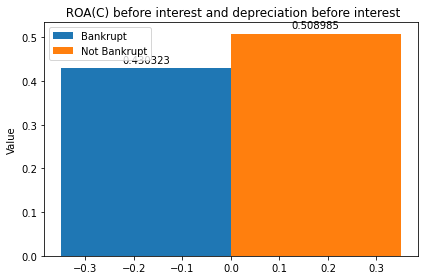

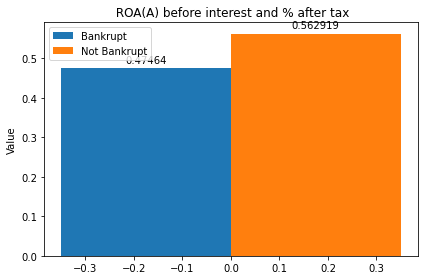

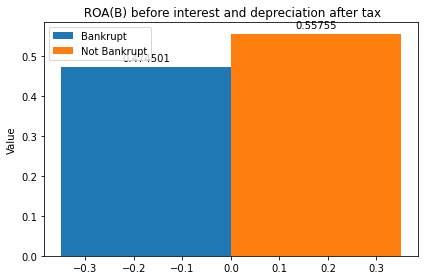

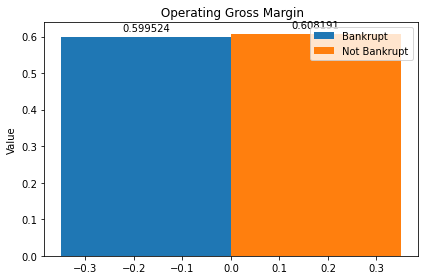

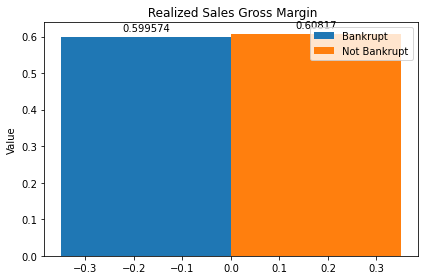

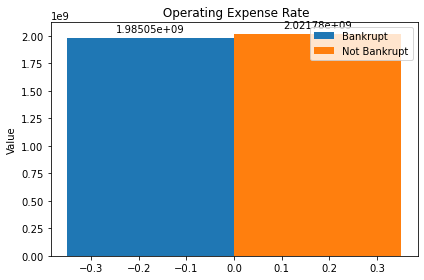

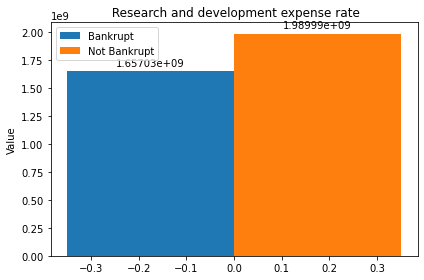

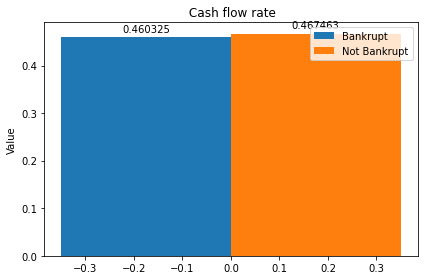

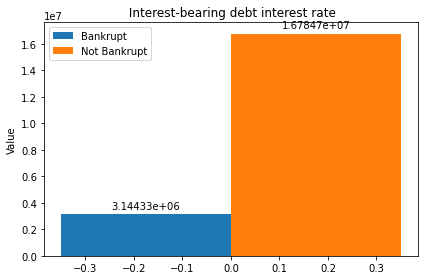

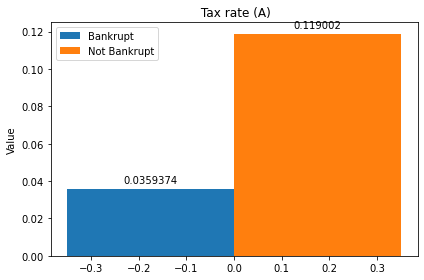

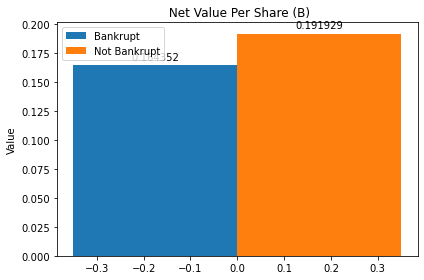

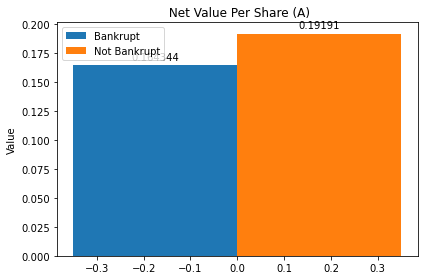

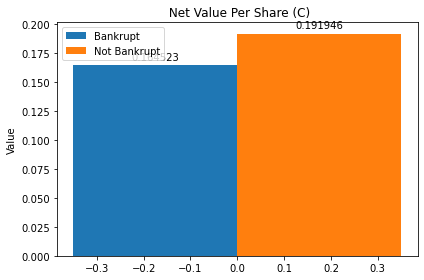

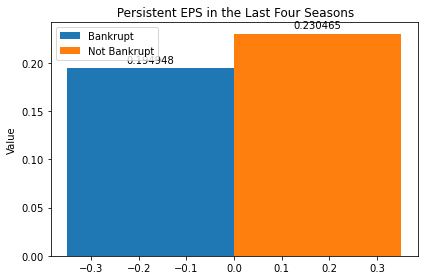

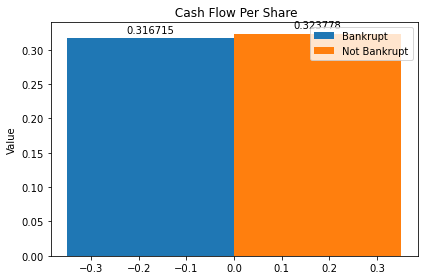

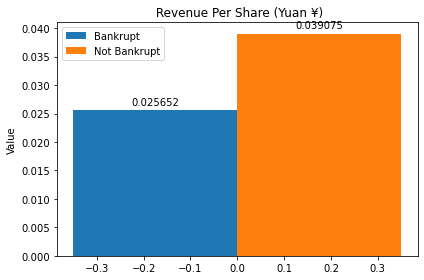

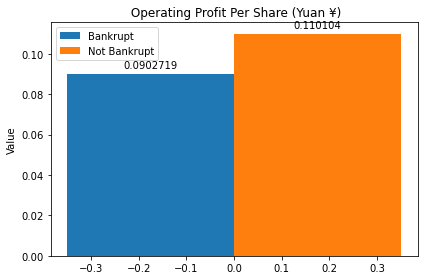

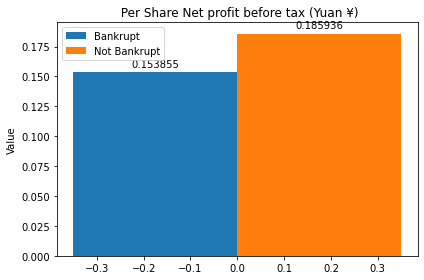

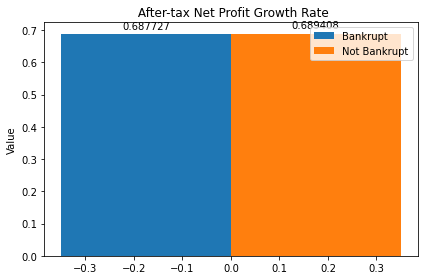

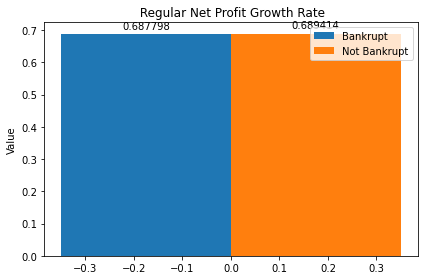

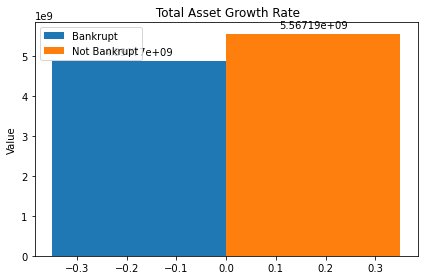

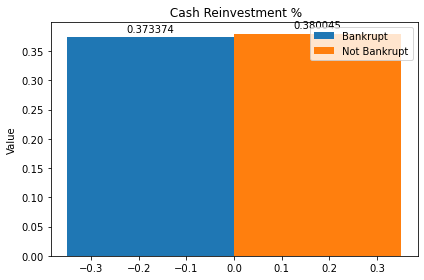

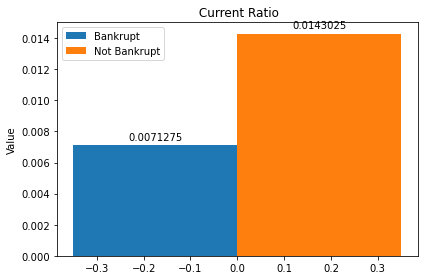

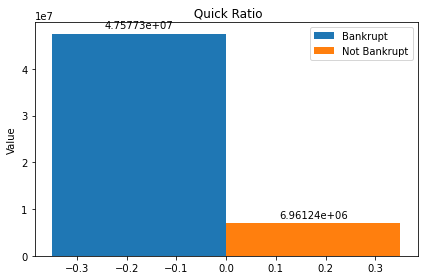

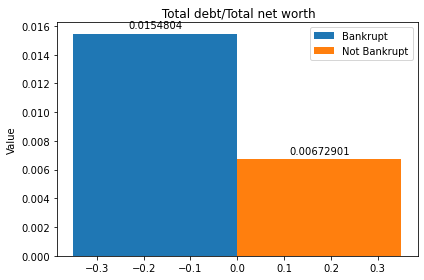

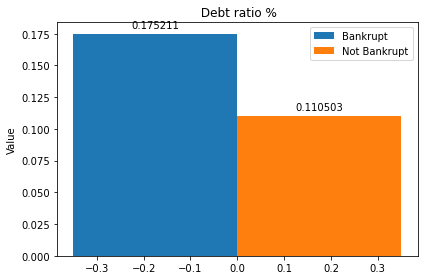

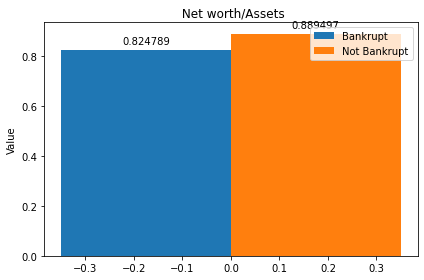

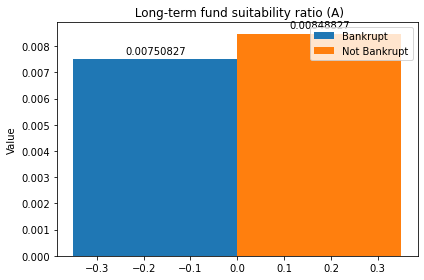

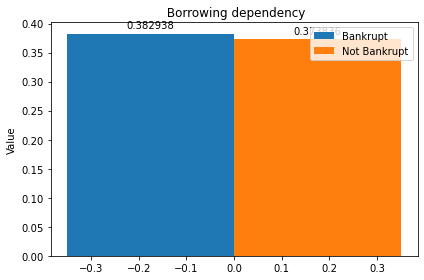

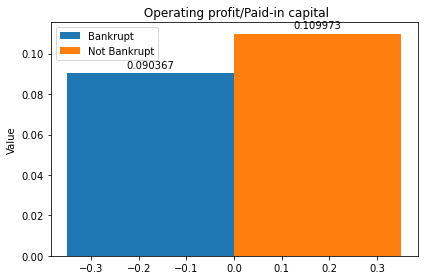

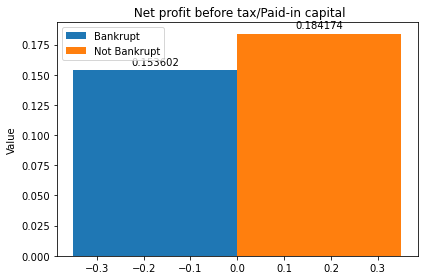

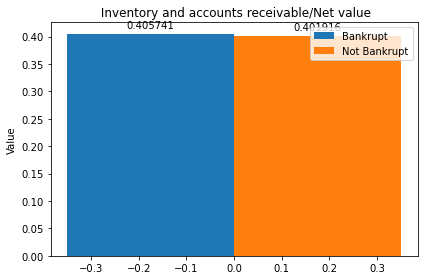

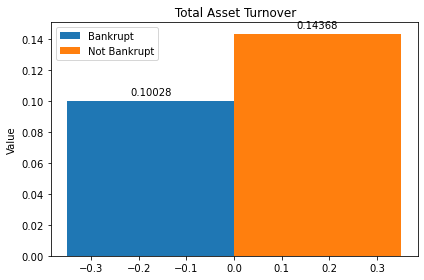

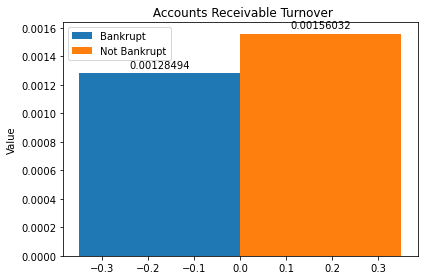

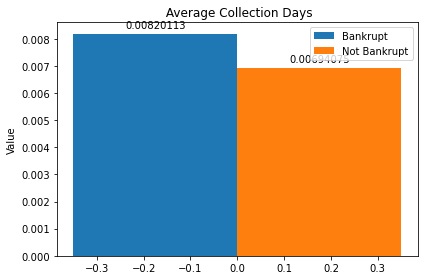

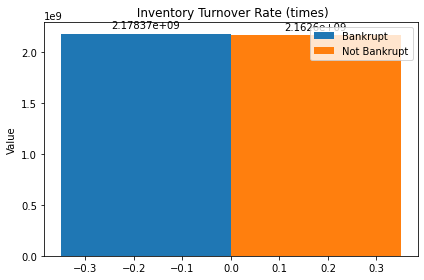

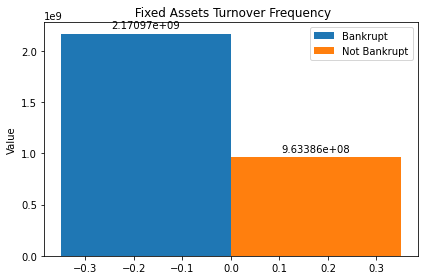

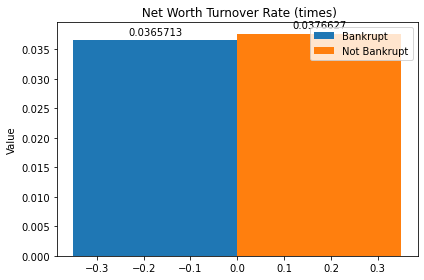

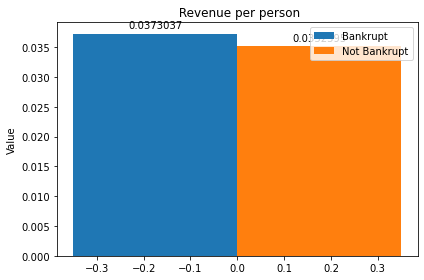

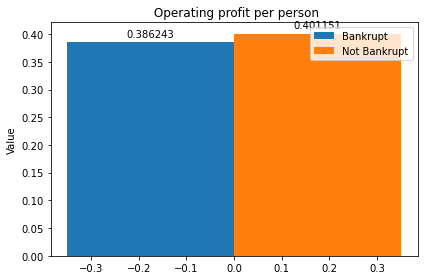

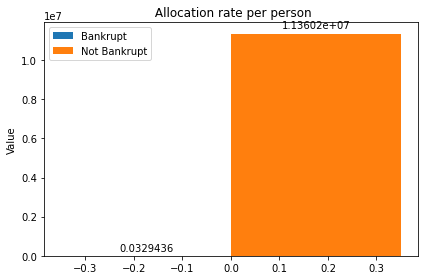

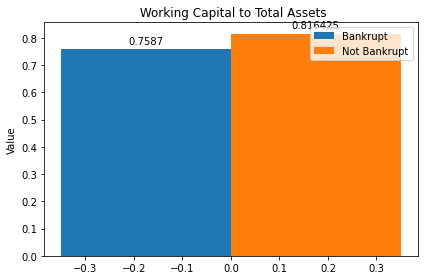

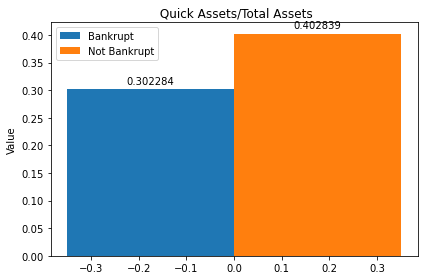

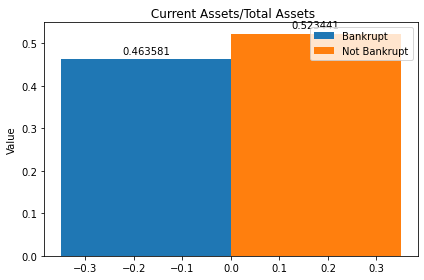

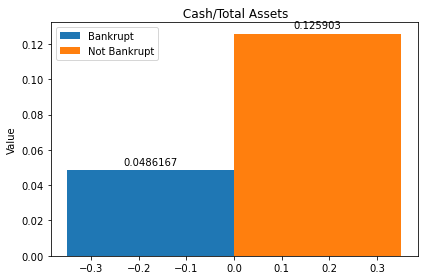

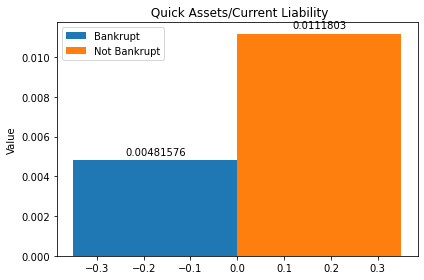

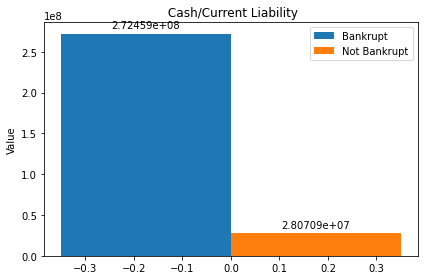

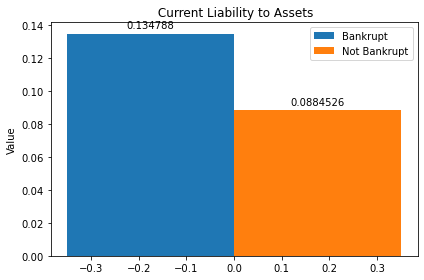

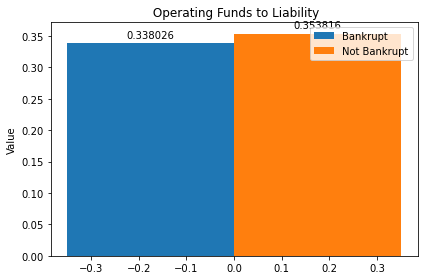

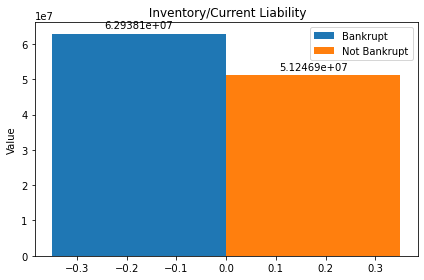

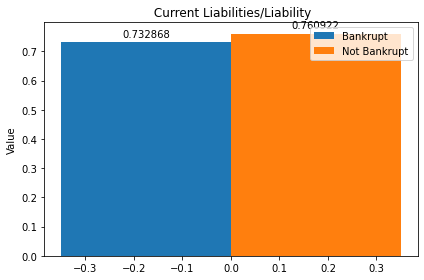

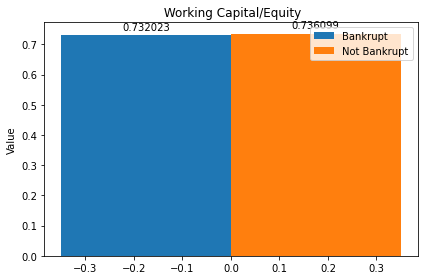

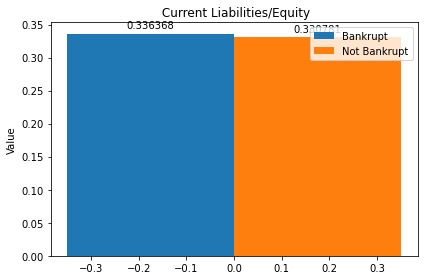

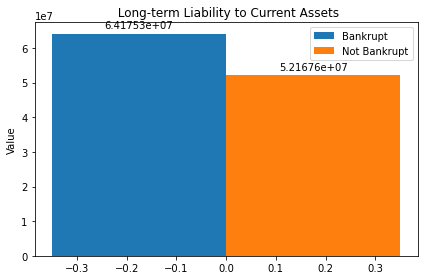

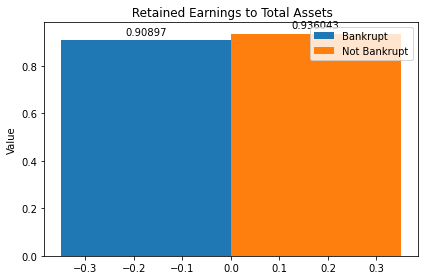

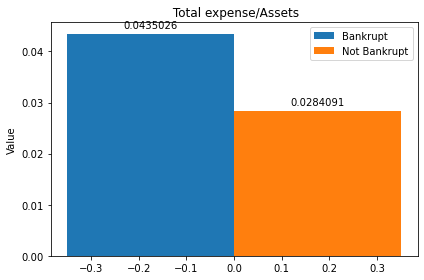

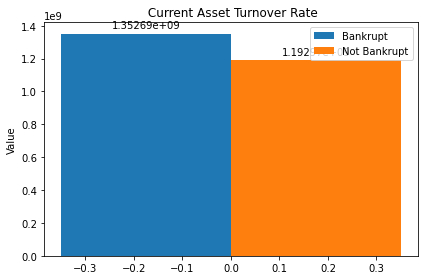

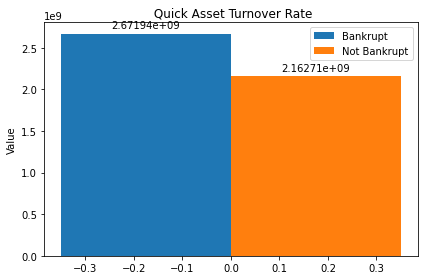

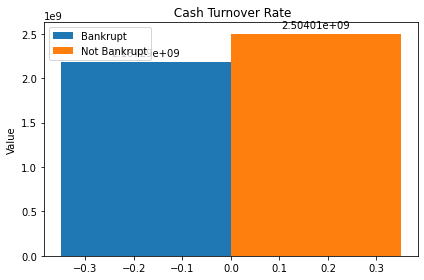

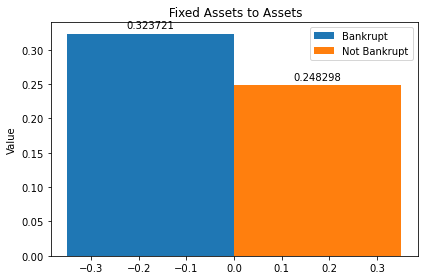

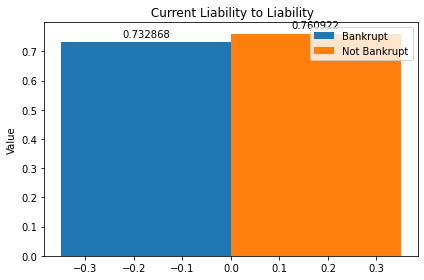

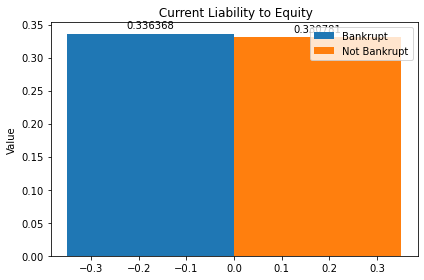

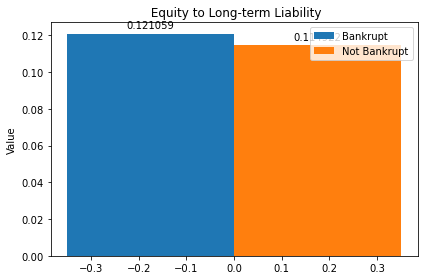

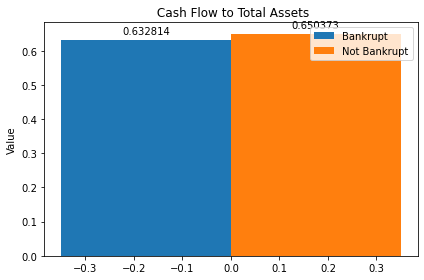

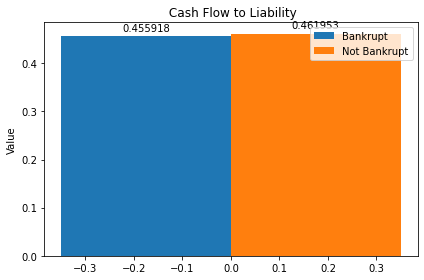

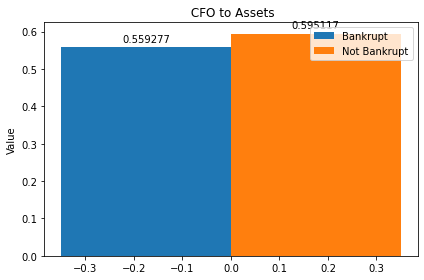

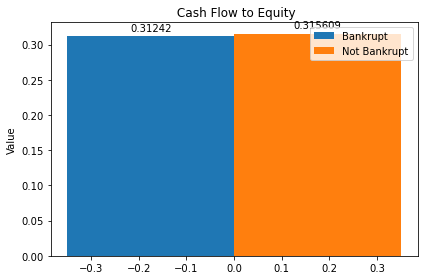

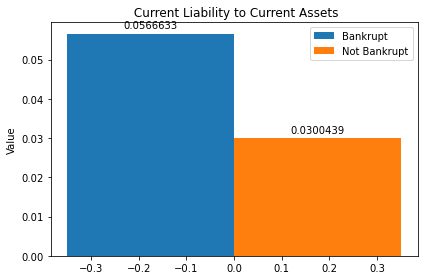

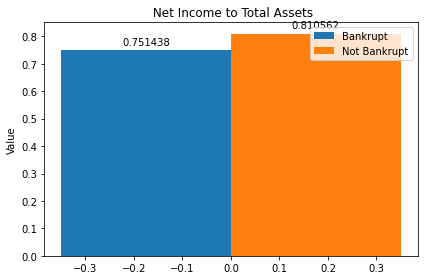

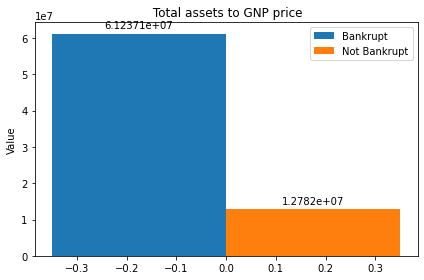

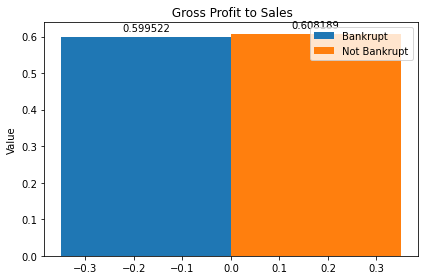

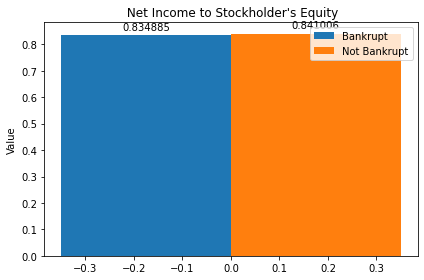

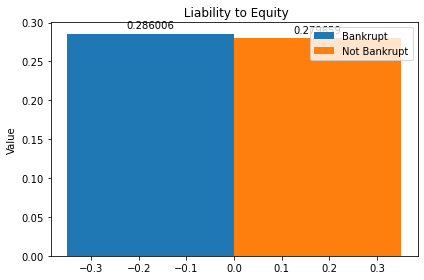

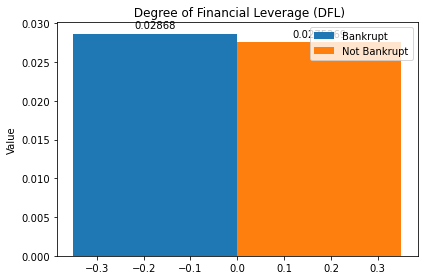

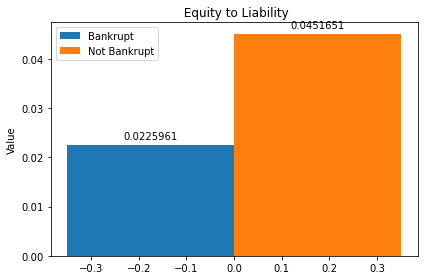

In [216]:
labels = df_filtered_reduced.columns.tolist()
means = df_filtered_reduced.groupby("Bankrupt?").mean()
bankrupt_means = means.iloc[1].tolist()
non_bankrupt_means = means.iloc[0].tolist()

labels.pop(0)
for i, label in enumerate(labels):
    
    x = np.arange(1)
    width=0.35
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, bankrupt_means[i], width, label='Bankrupt')
    rects2 = ax.bar(x + width/2, non_bankrupt_means[i], width, label='Not Bankrupt')

    ax.set_ylabel('Value')
    ax.set_title(label)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

Wow, our bar graphs look so much better now that all those extreme outliers are gone! Let's take another quick look at our distribution graphs.

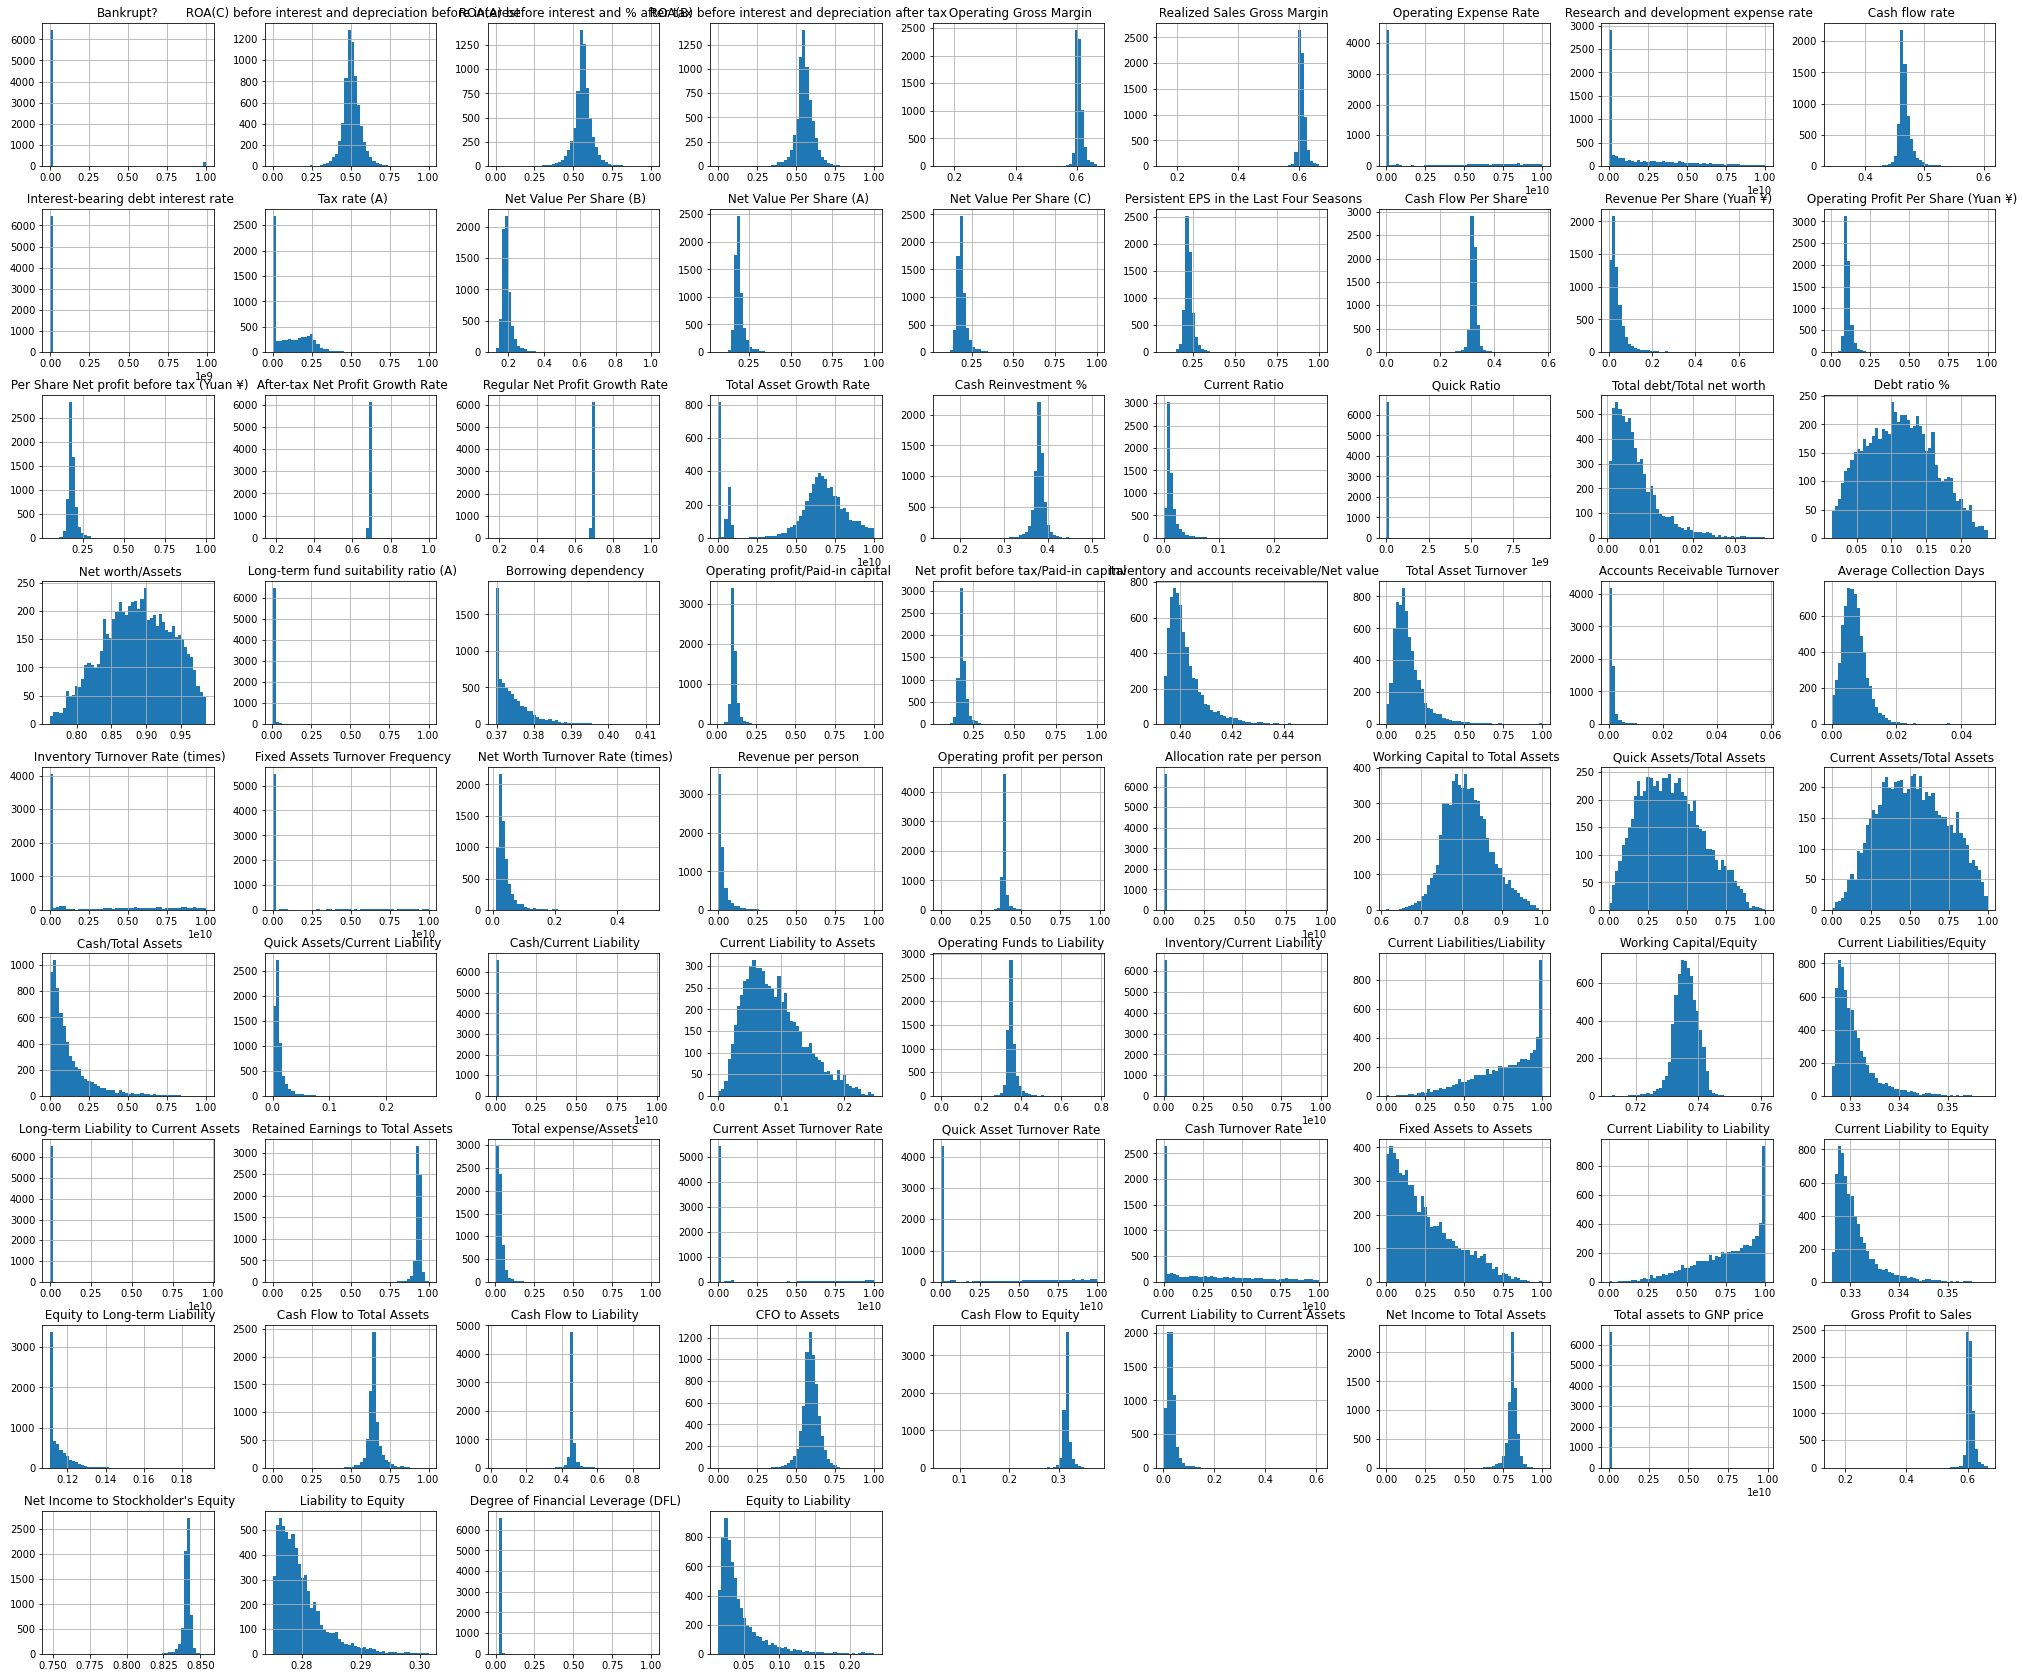

In [217]:
df_filtered_reduced.hist(figsize = (35,30), bins = 50)
plt.show()

## Using SMOTE to balance our data

Let's have another quick look at our value counts

In [218]:
df_filtered_reduced['Bankrupt?'].value_counts()

0    6450
1     194
Name: Bankrupt?, dtype: int64

Our mission is to get the value count of the bankrupt entries equal to that of the non-bankrupt ones.

First, let's split our X and Y data sets.

In [219]:
from imblearn.over_sampling import SMOTE

X=df_filtered_reduced.drop(['Bankrupt?'], axis=1)
y=df_filtered_reduced['Bankrupt?']

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [223]:
y_resampled.value_counts()

1    6450
0    6450
Name: Bankrupt?, dtype: int64

By using smote, we now have a perfectly balanced dataset. We are now ready to get started building our machine learning model.

## Building a machine learning model

### Evaluation Function

In [224]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * errors.sum() / len(test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Let's split our dataset into training and test sets

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Let's fit our training data to the base RandomForestRegressor and see what happens

In [230]:
%%time

from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
model.fit(X_train, y_train)

CPU times: user 43.9 s, sys: 4.29 ms, total: 43.9 s
Wall time: 43.9 s


RandomForestRegressor()

In [231]:
evaluate(model, X_test, y_test)

Model Performance
Average Error: 0.0542 degrees.
Accuracy = 94.58%.


94.58178294573644

Not bad, but we can probably improve the accuracy with some hyperparameter tuning.

In [232]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [235]:
%%time

rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  32.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=12.6min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=13.2min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time= 7.9min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  27.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=  43.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estim

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  10.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=14.8min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 4.5min
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 2.8min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 1.3min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time= 1.3min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 1.2min
[CV] END bootstrap=True, max_depth=80

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   9.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  32.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  31.1s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  26.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  25.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 8.3min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=  34.1s
[CV] END bootstrap=False, max_depth=90, 

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [236]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0472 degrees.
Accuracy = 95.28%.
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  34.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  27.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  41.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 8.2min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 1.6min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  54.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_est

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  34.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  26.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  40.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 8.6min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time= 1.5min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=  53.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=  31.5s
[CV] END bootstrap=False, max_depth

In [237]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400)

In [238]:
import pickle

filename = 'RF_model.sav'
pickle.dump(best_random, open(filename, 'wb'))

In [239]:
loaded_model = pickle.load(open(filename, 'rb'))
evaluate(loaded_model, X_test, y_test)

Model Performance
Average Error: 0.0472 degrees.
Accuracy = 95.28%.


95.28110465116279

In [240]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [246]:
preds = loaded_model.predict(X_test)
X_test_preds = X_test
X_test_preds["pred"] = preds
X_test_preds["target"] = y_test

In [247]:
X_test_preds

ROA(C) before interest and depreciation before interest  \
11500                                           0.445887          
6149                                            0.508507          
8                                               0.488519          
10517                                           0.455525          
11498                                           0.349241          
...                                                  ...          
1851                                            0.479745          
6520                                            0.581924          
4149                                            0.506508          
3418                                            0.687954          
5761                                            0.491688          

        ROA(A) before interest and % after tax  \
11500                                 0.469048   
6149                                  0.563072   
8                                     0.545137   
10517                                 0.493495   
11498                                 0.390884   
...                                        ...   
1851                                  0.495475   
6520                                  0.616332   
4149                                  0.569505   
3418                                  0.954536   
5761                                  0.548735   

        ROA(B) before interest and depreciation after tax  \
11500                                           0.491851    
6149                                            0.559987    
8                                               0.543284    
10517                                           0.504374    
11498                                           0.376703    
...                                                  ...    
1851                                            0.512661    
6520                                            0.650356    
4149                                            0.563895    
3418                                            0.741689    
5761                                            0.543605    

        Operating Gross Margin   Realized Sales Gross Margin  \
11500                 0.588338                      0.588338   
6149                  0.605183                      0.605183   
8                     0.603612                      0.603612   
10517                 0.596569                      0.596569   
11498                 0.614523                      0.614523   
...                        ...                           ...   
1851                  0.609385                      0.609385   
6520                  0.630926                      0.630926   
4149                  0.607129                      0.606999   
3418                  0.617629                      0.617954   
5761                  0.602084                      0.602055   

        Operating Expense Rate   Research and development expense rate  \
11500             9.300802e+09                            3.120283e+09   
6149              1.103172e-04                            4.620000e+09   
8                 1.687136e-04                            0.000000e+00   
10517             7.318803e+09                            4.108778e+08   
11498             1.349240e-03                            8.577330e-04   
...                        ...                                     ...   
1851              2.101115e-04                            1.017014e-04   
6520              2.868941e-04                            1.039086e-04   
4149              1.484773e-04                            1.400729e-04   
3418              3.240000e+09                            0.000000e+00   
5761              8.900000e+09                            5.250000e+09   

        Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)  \
11500         0.465144                              0.000425       0.000000   
6149          0.467136                              0

In [248]:
X_test_preds.to_csv("X_test_preds.csv")

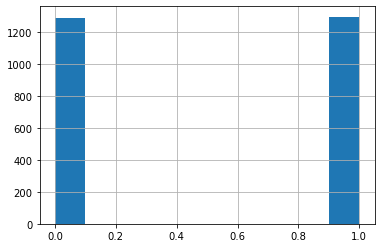

In [249]:
y_test.hist()
plt.show()

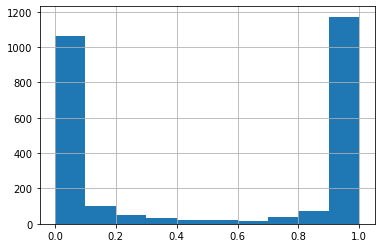

In [252]:
X_test_preds['pred'].hist()
plt.show()